# 1 Background

Industri penerbangan adalah salah satu industri yang sangat penting untuk manusia. Penerbangan menghubungkan tempat-tempat di berbagai negara dan benua. Permintaan yang cukup tinggi akan transportasi udara komersial membuat banyak perusahaan-perusahaan maskapai penerbangan berdiri. Untuk dapat bersaing, suatu perusahaan maskapai penerbangan harus dapat memenuhi keinginan pasar. Sangat penting bagi maskapai penerbangan untuk memperhatikan kepuasan penumpang, karena hal tersebut dapat mempengaruhi pilihan konsumen.

Setelah pandemi berakhir, kesibukan kembali terlihat di bandara di seluruh negara. Akan tetapi, **tingkat kepuasan dari penumpang menurun di AS**. Michael Taylor dari J.D. Power perbendapat hal ini tidak menjadi hal buruk jika maskapai dapat beradaptasi dan memperbaiki pelayanan sehingga penumpang merasa lebih dihargai.

Sebagai bentuk adaptasi perusahaan maskapai, perbaikan ingin dilakukan terhadap pelayanan yang diberikan kepda penumpang. Hal ini bertujuan agar konsumen tidak pergi mencari maskapai penerbangan baru.

sumber : https://edition.cnn.com/travel/article/jd-power-2022-north-american-airline-satisfaction-survey-results/index.html

# 2 Problem Statement

Perusahaan maskapai ingin memperbaiki pelayanan yang diberikan kepada penumpang. Untuk itu, perlu dianalisis :
* Kategori penumpang mana yang merasa tidak puas dan yang puas?
* Pelayanan mana yang berpengaruh kepada kepuasan penumpang?
* Apa yang dapat dilakukan maskapai dalam meningkatkan kepuasan penumpang?

# 3 Data

Data kepuasan pelanggan dimabil dari :
* Website : https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction
* Pengupload :

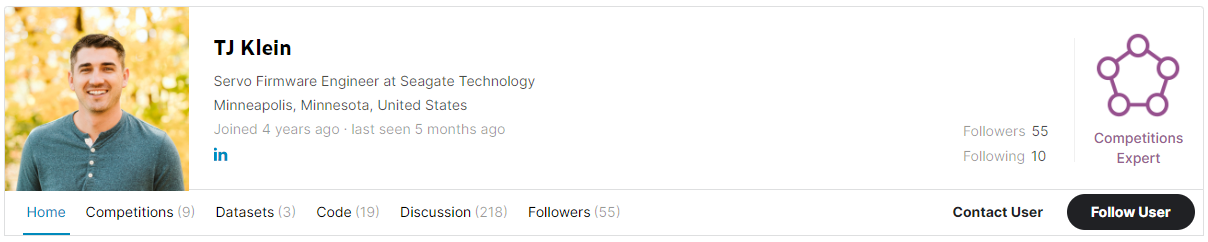

In [1]:
# Import Libraries yang akan digunakan

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from scipy.stats import normaltest # D'agustino & Pearson test untuk uji distribusi normal
from scipy.stats import ttest_ind # T Test Independent
from scipy.stats import chi2_contingency # uji chi squared
from scipy.stats import mannwhitneyu # Mann whitney test untuk uji hipotesis non parametrik
from scipy.stats import kruskal # Kruskal Wallis test

In [2]:
# Mengambil dataset yang akan dianalisis, disimpan pada variabel `df`

df = pd.read_csv("airline passanger satisfaction.csv", index_col = 0)  # parameter `index_col = 0` digunakan untuk menunjuk kolom 0 menjadi index
display(df.head(),df.tail())                                           # menunjukan 5 data teratas dan terbawah

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,3,...,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


Penjelasan kolom :
- `id` : nomer id perjalanan
- `Gender` : Gender penumpang, laki-laki (**Male**) atau perumpuan (**Female**)
- `Customer` Type : tipe pelanggan, setia (**Loyal Customer**) atau tidak setia (**Disloyal Customer**)
- `Age` : umur penumpang (**Tahun**)
- `Type of Travel` : tujuan perjalanan penumpang, perjalanan bisnis (**Business travel**) atau perjalanan personal (**Personal travel**)
- `Class` : tipe kelas penerbangan penumpang (**Business**, **Eco**, atau **Eco Plus**)
- `Flight Distance` : jarak tempuh perjalanan penumpang (**Miles**)
- kolom penilaian dari layanan perjalanan. berisikan nilai 1 sampai 5 (0 sebagai jawaban not applicable). terdiri dari :
    - `Inflight wifi service` : kepuasan pada layanan **wifi** pada saat penerbangan
    - `Departure/Arrival time convenient` : kepuasan pada waktu **kedatangan/keberangkatan**
    - `Ease of Online booking` : kepuasan saat **booking online**
    - `Gate location` : kepuasan pada lokasi **gerbang bandara**
    - `Food and drink` : kepuasan akan **makanan dan minimuan**
    - `Online boarding` : kepuasan akan **boarding online**
    - `Seat comfort` : kepuasan akan kenyamanan **tempat duduk**
    - `Inflight entertainment` : kepuasan pada **hiburan** di perjalanan
    - `0n-board service` : kepuasan pada **pelayanan kabin**
    - `Leg room service` : kepuasan akan **ruang kaki**
    - `Baggage handling` : kepuasan akan penanganan **barang bawaan**
    - `Check-in service` : kepuasan pada pelayanan **check-in**
    - `Inflight service` : kepuasan pada **pelayanan di pesawat**
    - `Cleanliness` : kepuasan akan **kebersihan**
- `Departure Delay in Minutes` : keterlabatan keberangkatan (**Menit**)
- `Arrival Delay in Minutes` : keterlabatan kedatangan (**Menit**)
- `Satisfaction` : tingkat kepuasan penerbangan, **satisfied** atau **neutral or dissatisfaction**

# 4 Data Understanding and Cleaning

## 4.1 Deskripsi Data

In [3]:
# meilihat informasi pada dataset airline satisfaction
df.info()                                       # melihat infromasi dari dataframe df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [4]:
# meilihat deskripsi variabel pada data set, menggunakan fungsi display
display(
    df[["id","Age","Flight Distance"]].describe(),                                                                        # data infromasi pribadi penumpang (numerik)
    df.describe(include = "object"),                                                                                      # data infromasi pribadi penumpang (kategorik) dan tingkat kepuasan penumpang
    df[["Departure Delay in Minutes","Arrival Delay in Minutes"]].describe(),                                             # data informasi waktu keterlambatan keberangkatan dan kedatangan penumpang
    df.drop(["id","Age","Flight Distance","Departure Delay in Minutes","Arrival Delay in Minutes"], axis = 1).describe()  # data hasil penilaian penumpang terhadap layanan
)

,id,Age,Flight Distance
count,103904.000000,103904.000000,103904.000000
mean,64924.210502,39.379706,1189.448375
std,37463.812252,15.114964,997.147281
min,1.000000,7.000000,31.000000
25%,32533.750000,27.000000,414.000000
50%,64856.500000,40.000000,843.000000
75%,97368.250000,51.000000,1743.000000
max,129880.000000,85.000000,4983.000000


,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103594.000000
mean,14.815618,15.178678
std,38.230901,38.698682
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,12.000000,13.000000
max,1592.000000,1584.000000


,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351
std,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
# melihat jumlah missing values pada data
df.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [6]:
# melihat apakah terdapat data duplikat & apakah ada data duplikat pada kolom id
print(f"terdapat {df.duplicated().sum()} data duplikat secara keseluruhan dan {df.duplicated(subset = 'id').sum()} pada kolom `id`")

terdapat 0 data duplikat secara keseluruhan dan 0 pada kolom `id`


secara umum, infromasi yang didapatkan dari dataset adalah :
1. data terdiri dari 103904 baris dan 24 kolom.
1. pada kolom kategorik (`Gender`,`Customer Type`,`Type of Travel`,`Class`, dan `satisfaction`) jumlah value yang unik sudah sesuai dengan keterangan sumber, sehingga kolom tidak perlu ditindak lanjuti.
1. kolom `Age` dan `Flight Distance` memiliki range data yang masuk akal. Lakukan pencarian outliers pada kedua data inj untuk melihat apakah betul data tersebut sudah tepat.
1. pada kolom-kolom penilaian pelayan, terdapat value 0 pada tiap kolom, kecuali kolom `Baggage handling`. nilai 0 tersebut mungkin dapat terjadi karena penumpang :
    * menolak memberikan jawaban
    * tidak mendapatkan layanan sehingga tidak memiliki jawaban
    * terjadi kesalahan saat mengisi jawaban, sehingga jawaban tidak terbaca.
1. tidak terdapat data duplikat secara keseluruhan. pada tabel `id` juga tidak terdapat data duplikat. hal ini menandakan bahwa setiap data mewakili satu kali perjalanan seorang penumpang, dan id hanya mewakili satu perjalanan.
1. variabel `Arrival Delay in Minutes` miliki missing value, berjumlah 310 data.

## 4.2 Informasi Variabel Numerik

Variabel numerik pada dataset akan diteliti lebih lanjut apakah data yang ada memiliki anomali. Variabel yang akan diteliti diantaranya adalah `Age`, `Flight Distance`, `Departure Delay in Minutes`, dan `Arrival Delay in Minutes`. Variabel penilaian pelayanan dari penumpang digunakan sebagai data kategori, walaupun valuenya merupakan integer. Analisis Likert scale menjadi data ordinal atau interval menjadi perdebatan samapi sekarang. Pada analisis ini, data penilaian dijadikan data katgorik ordinal.

sumber : https://www.quora.com/Is-the-Likert-scale-a-categorical-variable

In [7]:
# kolom `Age`

df["Age"].describe().round(2)  # Melihat statistik deskribtif dari variabel `Age`

count    103904.00
mean         39.38
std          15.11
min           7.00
25%          27.00
50%          40.00
75%          51.00
max          85.00
Name: Age, dtype: float64

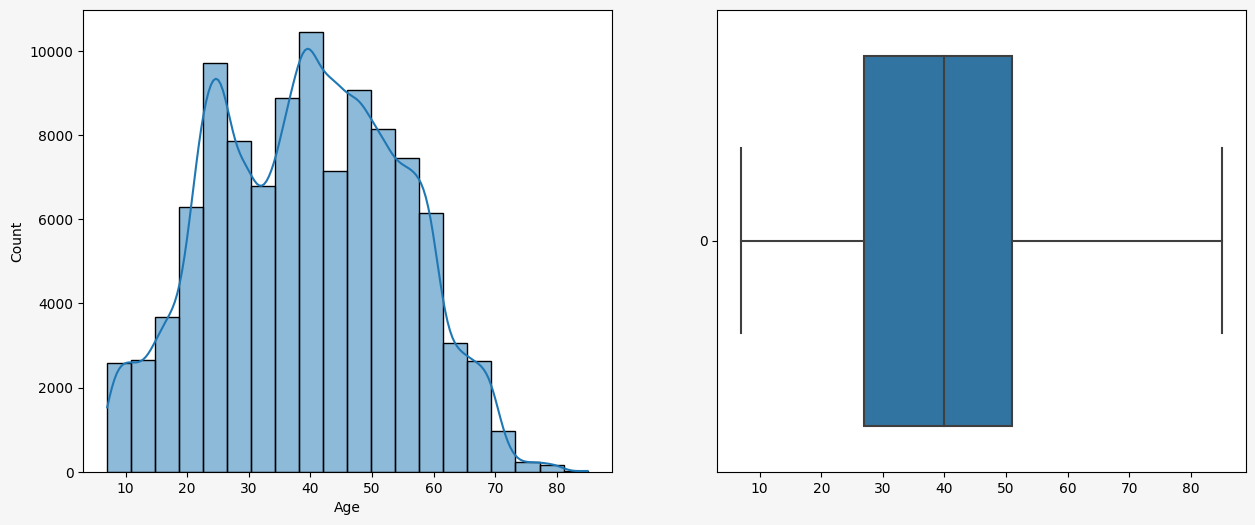

In [8]:
# menunjukan distribusi variabel `Age`
fig, axs =  plt.subplots(1, 2, figsize=(15, 6), facecolor = "#f6f6f6")

sns.histplot(df["Age"], bins = 20, kde = True, ax = axs[0])
sns.boxplot(df["Age"], orient = "h", ax = axs[1])

plt.show()

In [9]:
# Lakukan uji normal pada pada kolom `Age
stats, pval = normaltest(df["Age"])

if pval > 0.05:                        # nilai signifikansi (a) = 5% atau 0.05
    print("Asumsikan normal")
else:
    print("Tidak diasumsikan normal")

Tidak diasumsikan normal


In [10]:
# Pencarian IQR
iqr = df["Age"].describe().round(2)["75%"] - df["Age"].describe().round(2)["25%"]
batas_atas = df["Age"].describe().round(2)["75%"] + 1.5 * iqr
batas_bawah = df["Age"].describe().round(2)["25%"] - 1.5 * iqr
print(f"Dari IQR, batas atas dan batas bawah pada data masing-masing adalah {batas_atas} dan {batas_bawah}")

Dari IQR, batas atas dan batas bawah pada data masing-masing adalah 87.0 dan -9.0


Dari informasi diatas, diketahui :
* Umur dari penumpang maskapai **tidak terdistribusi normal**, melainkan positive skewed. Untuk itu measure of central tendencies yang digunakan adalah median dan measure of spread yang digunakan adalah range dan IQR
* **Tidak ada data ouliers** pada variabel "Age" jika dilihat dari boxplot. Jika batas bawah dan batas atas dihitung menggukan IQR, hasilnya data outliers tidak ditemukan, karena penumpang yang paling muda tercatat berumur 7 tahuh, dan yang paling tua berumur 85 Tahun.

Data `Age` sudah baik, sehingga tidak diperlukan tindakan pada kolom tersebut.

In [11]:
# kolom `Flight Distance`

df["Flight Distance"].describe().round(2)  # Melihat statistik deskribtif dari variabel `Flight Distance`

count    103904.00
mean       1189.45
std         997.15
min          31.00
25%         414.00
50%         843.00
75%        1743.00
max        4983.00
Name: Flight Distance, dtype: float64

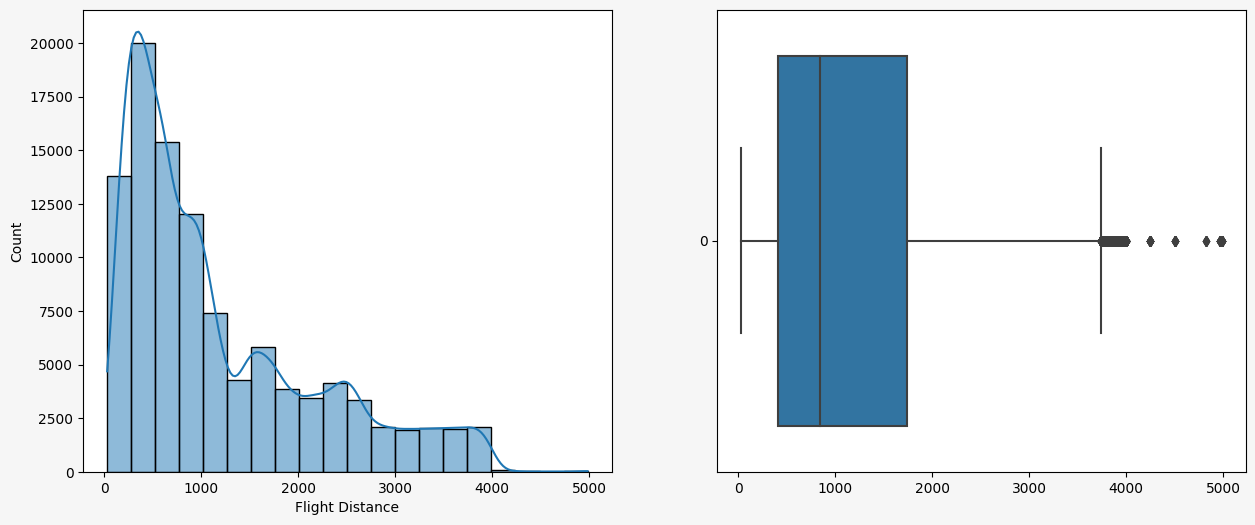

In [12]:
# menunjukan distribusi variabel `Flight Distance`
fig, axs =  plt.subplots(1, 2, figsize=(15, 6), facecolor = "#f6f6f6")

sns.histplot(df["Flight Distance"], bins = 20, kde = True, ax = axs[0])
sns.boxplot(df["Flight Distance"], orient = "h", ax = axs[1])

plt.show()

In [13]:
# Lakukan uji normal pada pada kolom `Flight Distance`
stats, pval = normaltest(df["Flight Distance"])

if pval > 0.05:                        # nilai signifikansi (a) = 5% atau 0.05
    print("Asumsikan normal")
else:
    print("Tidak diasumsikan normal")

Tidak diasumsikan normal


In [14]:
# Pencarian IQR
iqr = df["Flight Distance"].describe().round(2)["75%"] - df["Flight Distance"].describe().round(2)["25%"]
batas_atas = df["Flight Distance"].describe().round(2)["75%"] + 1.5 * iqr
batas_bawah = df["Flight Distance"].describe().round(2)["25%"] - 1.5 * iqr
print(f"Dari IQR, batas atas dan batas bawah pada data masing-masing adalah {batas_atas} dan {batas_bawah}")

Dari IQR, batas atas dan batas bawah pada data masing-masing adalah 3736.5 dan -1579.5


In [15]:
df[df["Flight Distance"] > batas_atas]["id"].count()

2291

Dari informasi diatas, diketahui :
* Jarak Tempuh dari penumpang maskapai **tidak terdistribusi normal**, melainkan positive skewed. Untuk itu measure of central tendencies yang digunakan adalah median dan measure of spread yang digunakan adalah range dan IQR
* Jarak terjauh yang ditempuh oleh penumpang adalah 4983.00 miles, dan jarak terdekat adalah 31.00 miles
* **Terdapat 2291 outliers** pada variabel jarak tempuh, dimana batas atas yang didapatkan dari IQR adalah 3736.5 miles. Outliers tersebut masih masuk akal karena jarak terjauh dari penerbangan adalah 4983.00 miles (jarak tempuh dari New York (JFK) ke Honolulu (HNL))

Data `Flight Distance` sudah baik, sehingga tidak diperlukan tindakan pada kolom tersebut.

sumber : https://www.airmilescalculator.com/distance/jfk-to-hnl/#:~:text=Flight%20distance%20from%20New%20York,is%209%20hours%2056%20minutes.

In [16]:
# kolom `Departure Delay in Minutes`
df["Departure Delay in Minutes"].describe().round(2)  # Melihat statistik deskribtif dari variabel `Departure Delay in Minutes`

count    103904.00
mean         14.82
std          38.23
min           0.00
25%           0.00
50%           0.00
75%          12.00
max        1592.00
Name: Departure Delay in Minutes, dtype: float64

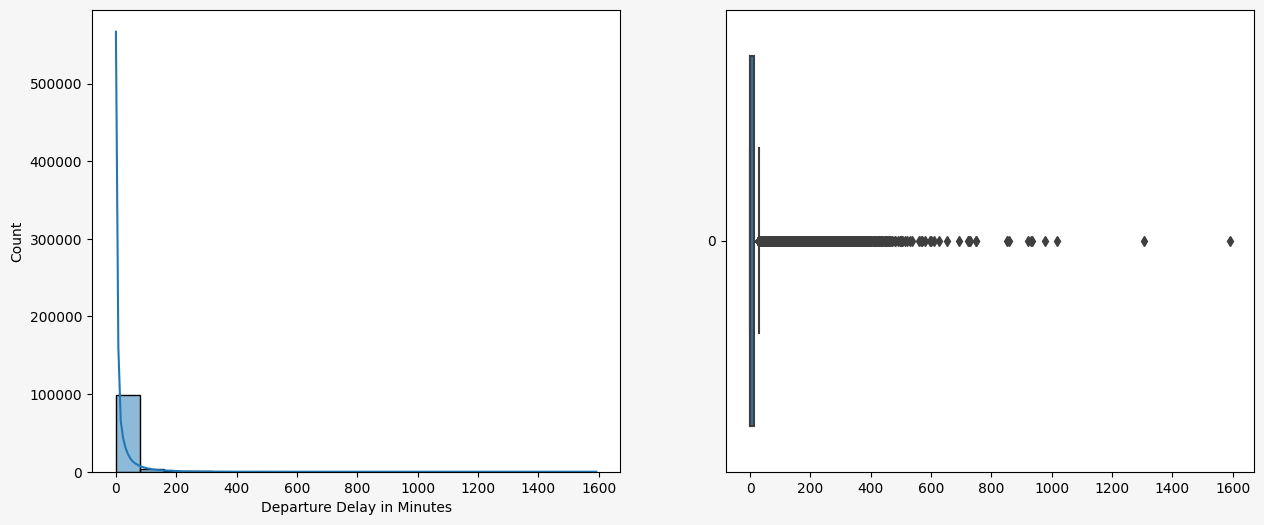

In [17]:
# menunjukan distribusi variabel `Departure Delay in Minutes`
fig, axs =  plt.subplots(1, 2, figsize=(15, 6), facecolor = "#f6f6f6")

sns.histplot(df["Departure Delay in Minutes"], bins = 20, kde = True, ax = axs[0])
sns.boxplot(df["Departure Delay in Minutes"], orient = "h", ax = axs[1])

plt.show()

In [18]:
# Lakukan uji normal pada pada kolom `Departure Delay in Minutes`
stats, pval = normaltest(df["Departure Delay in Minutes"])

if pval > 0.05:                        # nilai signifikansi (a) = 5% atau 0.05
    print("Asumsikan normal")
else:
    print("Tidak diasumsikan normal")

Tidak diasumsikan normal


In [19]:
# Pencarian IQR
iqr = df["Departure Delay in Minutes"].describe().round(2)["75%"] - df["Departure Delay in Minutes"].describe().round(2)["25%"]
batas_atas = df["Departure Delay in Minutes"].describe().round(2)["75%"] + 1.5 * iqr
batas_bawah = df["Departure Delay in Minutes"].describe().round(2)["25%"] - 1.5 * iqr
print(f"Dari IQR, batas atas dan batas bawah pada data masing-masing adalah {batas_atas} dan {batas_bawah}")

Dari IQR, batas atas dan batas bawah pada data masing-masing adalah 30.0 dan -18.0


In [20]:
df[df["Departure Delay in Minutes"] > batas_atas]["id"].count()

14529

Dari informasi diatas, diketahui :
* Keterlambatan keberangkatan dari penumpang maskapai **tidak terdistribusi normal**, melainkan positive skewed. Untuk itu measure of central tendencies yang digunakan adalah median dan measure of spread yang digunakan adalah range dan IQR
* Keterlamabatan penumpang yang paling parah adalah 1592 menit, lebih dari satu hari
* **Terdapat 14529 outliers** pada variabel `Departure Delay in Minutes`, dimana batas atas yang didapatkan dari IQR adalah 30 menit.
* Waktu yang parah tersebut mungkin diakibatkan berbagai macam hal, diataranya :
    * Cuaca parah yang mengakibatkan penerbangan ditunda hingga lebih dari 24 jam.
    * Penerbangan overbooked, sehingga penumpang yang tidak mendapatkan tempat duduk harus dijadwalkan ulang untuk penerbangan lain, sehingga waktu keberangkatan dihitung dari waktu keberangkatan awal.

Data `Departure Delay in Minutes` sudah cukup baik, sehingga tidak diperlukan tindakan pada kolom tersebut.

sumber : https://www.colibra.io/24-hour-flight-delay-compensation/

In [21]:
# kolom `Arrival Delay in Minutes`

df["Arrival Delay in Minutes"].describe().round(2)  # Melihat statistik deskribtif dari variabel `Arrival Delay in Minutes`

count    103594.00
mean         15.18
std          38.70
min           0.00
25%           0.00
50%           0.00
75%          13.00
max        1584.00
Name: Arrival Delay in Minutes, dtype: float64

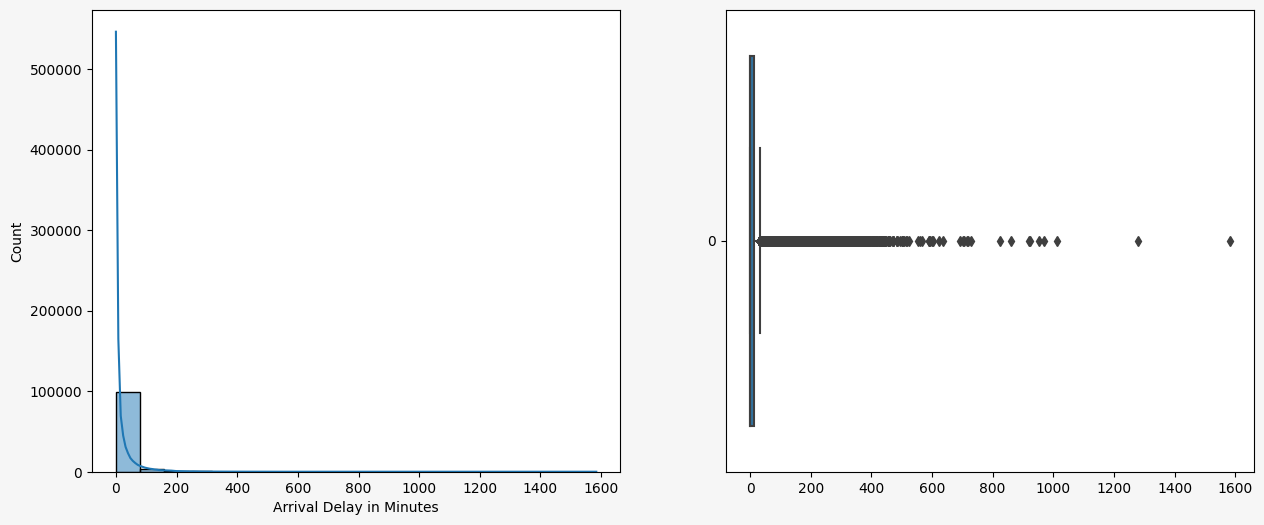

In [22]:
# menunjukan distribusi variabel `Departure Delay in Minutes`
fig, axs =  plt.subplots(1, 2, figsize=(15, 6), facecolor = "#f6f6f6")

sns.histplot(df["Arrival Delay in Minutes"], bins = 20, kde = True, ax = axs[0])
sns.boxplot(df["Arrival Delay in Minutes"], orient = "h", ax = axs[1])

plt.show()

In [23]:
# Lakukan uji normal pada pada kolom `Arrival Delay in Minutes`
stats, pval = normaltest(df["Arrival Delay in Minutes"])

if pval > 0.05:                        # nilai signifikansi (a) = 5% atau 0.05
    print("Asumsikan normal")
else:
    print("Tidak diasumsikan normal")

Tidak diasumsikan normal


In [24]:
# Pencarian IQR
iqr = df["Arrival Delay in Minutes"].describe().round(2)["75%"] - df["Arrival Delay in Minutes"].describe().round(2)["25%"]
batas_atas = df["Arrival Delay in Minutes"].describe().round(2)["75%"] + 1.5 * iqr
batas_bawah = df["Arrival Delay in Minutes"].describe().round(2)["25%"] - 1.5 * iqr
print(f"Dari IQR, batas atas dan batas bawah pada data masing-masing adalah {batas_atas} dan {batas_bawah}")

Dari IQR, batas atas dan batas bawah pada data masing-masing adalah 32.5 dan -19.5


In [25]:
df[df["Arrival Delay in Minutes"] > batas_atas]["id"].count()

13954

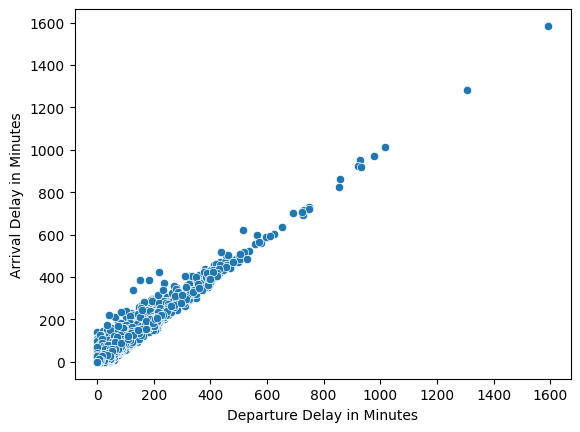

In [26]:
sns.scatterplot(data = df, x = "Departure Delay in Minutes", y = "Arrival Delay in Minutes")

plt.show()

In [27]:
df[["Arrival Delay in Minutes","Departure Delay in Minutes"]].corr(method = "spearman")

,Arrival Delay in Minutes,Departure Delay in Minutes
Arrival Delay in Minutes,1.000000,0.740843
Departure Delay in Minutes,0.740843,1.000000


Dari informasi diatas, diketahui :
* Keterlambatan kedatangan dari penumpang maskapai tidak terdistribusi normal, melainkan positive skewed. Untuk itu measure of central tendencies yang digunakan adalah median dan measure of spread yang digunakan adalah range dan IQR
* kedatangan penumpang yang paling parah adalah 1584 menit, lebih dari satu hari.
* Terdapat 14529 outliers pada variabel Arrival Delay in Minutes, dimana batas atas yang didapatkan dari IQR adalah 32.5 menit.
* Distribusi data `Arrival Delay in Minutes` dari mirip dengan data `Departure Delay in Minutes`.
* Hal ini terjadi karena keterlambatan dan keberangkatan memiliki korelasi yang tinggi, dibuktikan dengan uji spearman yang hasilnya 0,74 (memiliki korelasi yang kuat dan searah), dengan alasan ketika terjadi keterlabatan keberangkatan penumpang juga akan mengalami keterlambatan kedatangan.

Data `Arrival Delay in Minutes` sudah cukup baik. Akan tetapi, dari hasil pengecekan missing value, variabel ini masih memiliki 310 missing value yang harus ditindak.

## 4.3 Missing Value

Sejumlah missing value ditemukan pada variabel `Arrival Delay in Minutes`. Data tersebut harus dibersihkan terlebih dahulu

In [28]:
# Percobaan isi menggunakan median, karena data tidak terdistribusi normal
df[["Departure Delay in Minutes","Arrival Delay in Minutes"]].fillna(df["Arrival Delay in Minutes"].median())

,Departure Delay in Minutes,Arrival Delay in Minutes
0,25,18.0
1,1,6.0
2,0,0.0
3,11,9.0
4,0,0.0
...,...,...
103899,3,0.0
103900,0,0.0
103901,7,14.0
103902,0,0.0


<AxesSubplot: xlabel='Departure Delay in Minutes', ylabel='Arrival Delay in Minutes'>

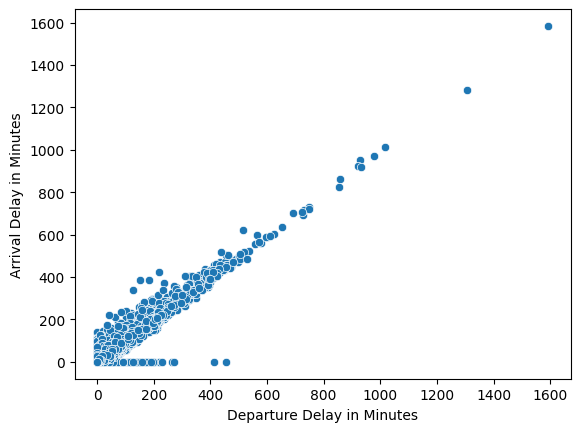

In [29]:
sns.scatterplot(data = df[["Departure Delay in Minutes","Arrival Delay in Minutes"]].fillna(df["Arrival Delay in Minutes"].median()), x = "Departure Delay in Minutes", y = "Arrival Delay in Minutes")

Metode pengisian missing value data `Arrival Delay in Minutes` kurang bijaksana. Hal ini dikarenakan ketika mengisi nilai median (0 menit), hal tersebut mengakitbatkan terbentuknya collective outliers. Outliers ini menjadi anomali ketika ada penumpang yang berangkat terlambat, dapat sampai tujuan tepat waktu. Cara lain perlu dicari untuk mengisi Missing Value pada kolom ini.

In [30]:
# Percobaan isi dengan nilai median dari nilai keterlambatan keberangkatan yang sama
df["Arrival Delay in Minutes"] = df.groupby("Departure Delay in Minutes")["Arrival Delay in Minutes"].apply(lambda x : round(x.fillna(x.median())))

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Surya Y. Pratidina\AppData\Local\Temp\ipykernel_9748\4072912509.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df["Arrival Delay in Minutes"] = df.groupby("Departure Delay in Minutes")["Arrival Delay in Minutes"].apply(lambda x : round(x.fillna(x.median())))


<AxesSubplot: xlabel='Departure Delay in Minutes', ylabel='Arrival Delay in Minutes'>

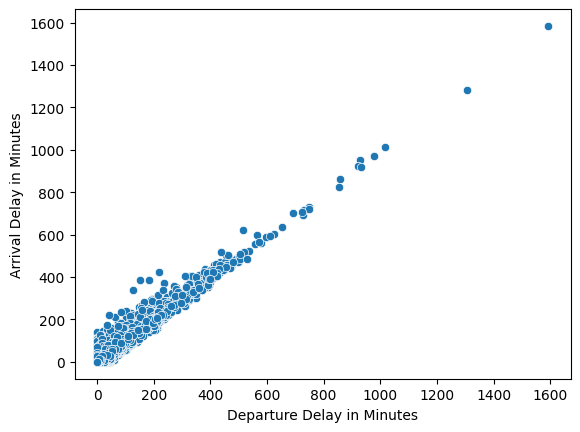

In [31]:
sns.scatterplot(data = df[["Departure Delay in Minutes","Arrival Delay in Minutes"]], x = "Departure Delay in Minutes", y = "Arrival Delay in Minutes")

In [32]:
df.isna().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             1
satisfaction                         0
dtype: int64

Metode ini bisa tidak menyebabkan collective outliers, tidak seperti sebelumnya. Metode tersebut menyisakan satu buah missing value. Data tersebut dapat di drop karena jumlahnya jauh lebih kecil

In [33]:
# melihat data yang ingin didrop
df[df["Arrival Delay in Minutes"].isna()]

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
71557,29974,Male,Loyal Customer,50,Business travel,Business,95,1,3,3,...,4,3,4,4,3,2,3,455,NaN,neutral or dissatisfied


In [34]:
# Drop data yang kolom `Arrival Delay in Minutes` terdapat missing value
df.dropna(inplace = True)

In [35]:
display(df.isna().sum(), df.shape)

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

(103903, 24)

Dari informasi di atas, dataset sudah tidak memiliki missing Value. Baris dari dataframe berkurang satu baris (menjadi 103903 baris)

## 4.4 Simpan Data Bersih

In [36]:
# untuk menyimpan data yang sudah dibersihkan, kode di bawah dapat dijalankan
# df.to_csv("airline passanger satisfaction - cleaned.csv")

# 5 Data analysis

Pertanyaan dibawah dapat dijawab untuk dapat memahami permasalahaan yang dialami oleh maskapai dan memberikan solusi untuk permasalahan tersebut :
1. Bagaimana perbandingan penumpang yang puas (satisfied) dan penumpang yang tidak puas (neutral or dissatisfied)?
1. Bagaimana Profil Penumpang Maskapai dan Bagaimana Penilaian mereka terhadap layanan?
1. Bagaimana penilaian Penumpang Terhadap Layanan Yang Diberikan?
1. Bagaimana keterlambatan mempengaruhi kepuasan penumpang?

## 5.1 Bagaimana perbandingan penumpang yang puas (satisfied) dan penumpang yang tidak puas (neutral or dissatisfied)?

In [37]:
# jumlah penumpang berdasarkan populasi
df_satisfaction = df.groupby("satisfaction")[["id"]].count() # menggunakan groupby untuk mengelompokan dan menghitung jumlah data.
df_satisfaction.rename({"id":"Number of Passengers"}, axis = 1, inplace = True)
df_satisfaction.index.name = "Passenger Satisfaction"
df_satisfaction

,Number of Passengers
Passenger Satisfaction,
neutral or dissatisfied,58878
satisfied,45025


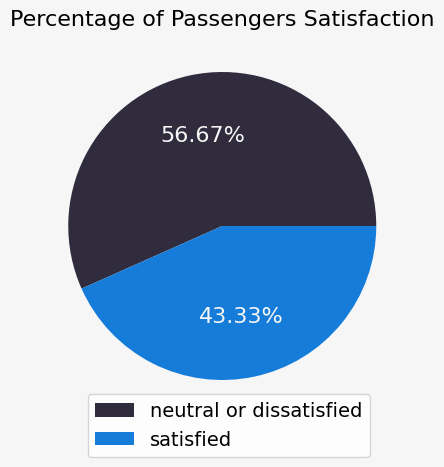

In [38]:
# Menggambar pie chart
plt.figure(figsize = (5,5), facecolor = "#f6f6f6")

plt.pie(df_satisfaction["Number of Passengers"], 
        textprops = {"fontsize" : 16, "color" : "#f6f6f6"}, 
        autopct = "%2.2f%%",
        colors = ["#302c3e", "#157dd9"])
plt.legend(labels = df_satisfaction.index.values, 
           loc = [0.15,-0.1], fontsize = 14)
plt.title("Percentage of Passengers Satisfaction", 
          size = 16, loc = "center")


plt.show()

## Insight :
Penumpang yang **netral atau tidak puas** berjumlah **58879** atau **56,67%** dari total penumpang. Jumlah tersebut lebih tinggi dari jumlah penumpang yang **puas** dengan layanan maskapai penerbangan yang berjumlah **45025** atau **43,33%** dari keseluruhan penumpang

## 5.2 Bagaimana Profil Penumpang Maskapai dan Bagaimana Kepuasan Mereka Terhadap Layanan?

In [39]:
df_gender = df.groupby("Gender")[["id"]].count()
df_gender.rename({"id":"Number of Passengers"}, axis = 1, inplace = True)

df_cutomer_type = df.groupby("Customer Type")[["id"]].count()
df_cutomer_type.rename({"id":"Number of Passengers"}, axis = 1, inplace = True)

df_travel_type = df.groupby("Type of Travel")[["id"]].count()
df_travel_type.rename({"id":"Number of Passengers"}, axis = 1, inplace = True)

df_class = df.groupby("Class")[["id"]].count()
df_class.rename({"id":"Number of Passengers"}, axis = 1, inplace = True)

df_age_flight_distance = df[["Age","Flight Distance"]].describe()

display(df_gender.T, df_cutomer_type.T, df_travel_type.T, df_class.T, df_age_flight_distance.T)

Gender,Female,Male
Number of Passengers,52727,51176


Customer Type,Loyal Customer,disloyal Customer
Number of Passengers,84922,18981


Type of Travel,Business travel,Personal Travel
Number of Passengers,71654,32249


Class,Business,Eco,Eco Plus
Number of Passengers,49664,46745,7494


,count,mean,std,min,25%,50%,75%,max
Age,103903.0,39.379604,15.115001,7.0,27.0,40.0,51.0,85.0
Flight Distance,103903.0,1189.458909,997.146298,31.0,414.0,843.0,1743.0,4983.0


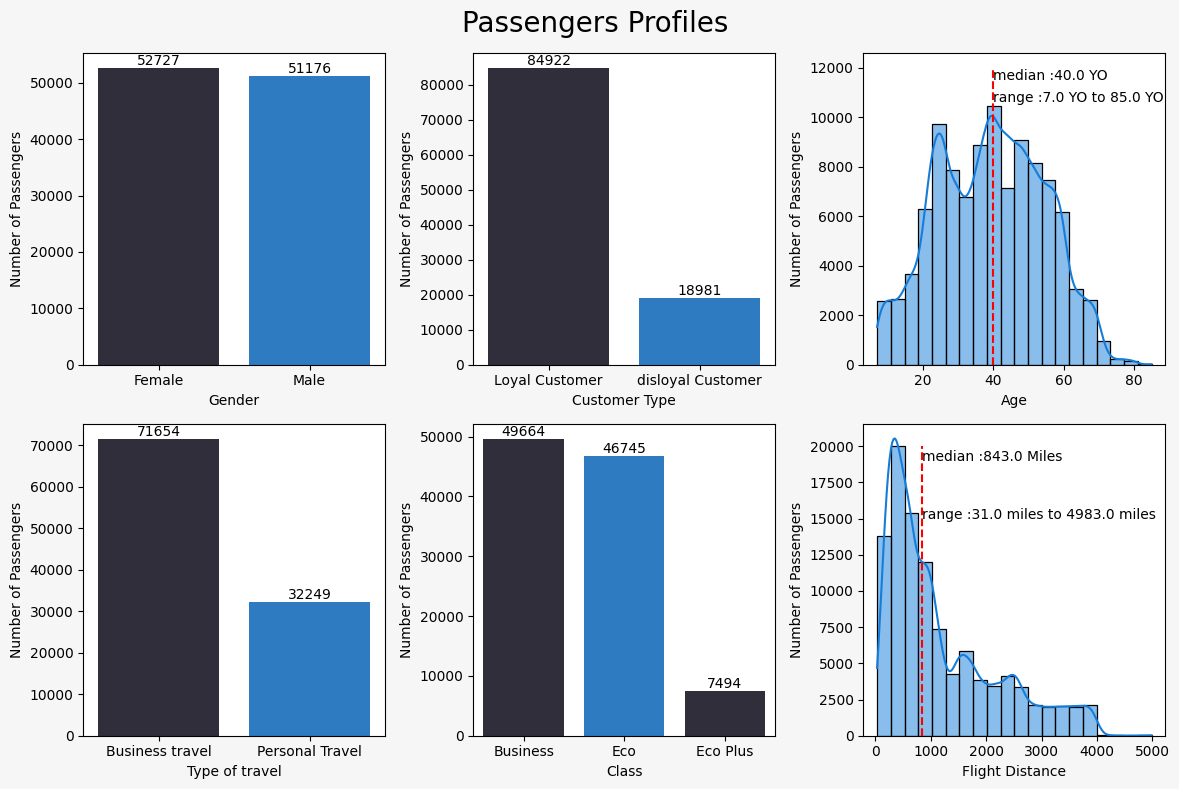

In [40]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8), facecolor = "#f6f6f6")
fig.suptitle("Passengers Profiles",size = 20)

bar_gender = sns.barplot(x = df_gender["Number of Passengers"].index.values, 
                         y = df_gender["Number of Passengers"], 
                         ax = axs[0, 0], 
                         palette = ["#302c3e", "#157dd9"])
bar_gender.bar_label(bar_gender.containers[0])
bar_gender.set_xlabel("Gender")
bar_gender.set_ylabel("Number of Passengers")

bar_ct = sns.barplot(x = df_cutomer_type["Number of Passengers"].index.values,
            y = df_cutomer_type["Number of Passengers"],
            ax = axs[0, 1],
            palette = ["#302c3e", "#157dd9"])
bar_ct.bar_label(bar_ct.containers[0])
bar_ct.set_xlabel("Customer Type")
bar_ct.set_ylabel("Number of Passengers")

bar_tt = sns.barplot(x = df_travel_type["Number of Passengers"].index.values,
            y = df_travel_type["Number of Passengers"],
            ax = axs[1, 0],
            palette = ["#302c3e", "#157dd9"])
bar_tt.bar_label(bar_tt.containers[0])
bar_tt.set_xlabel("Type of travel")
bar_tt.set_ylabel("Number of Passengers")

bar_class = sns.barplot(x = df_class["Number of Passengers"].index.values,
            y = df_class["Number of Passengers"],
            ax = axs[1, 1],
            palette = ["#302c3e", "#157dd9"])
bar_class.bar_label(bar_class.containers[0])
bar_class.set_xlabel("Class")
bar_class.set_ylabel("Number of Passengers")

bar_age = sns.histplot(df["Age"], bins = 20, kde = True, ax = axs[0, 2], color = "#157dd9")
bar_age.set_ylabel("Number of Passengers")
bar_age.plot([df["Age"].quantile(0.5),df["Age"].quantile(0.5)],[0,12000], "r--")
bar_age.text(df["Age"].quantile(0.5), 11500, "median :" + str(df["Age"].quantile(0.5)) + " YO", fontsize=10)
bar_age.text(df["Age"].quantile(0.5), 10600, "range :" + str(df["Age"].quantile(0)) + " YO to " + str(df["Age"].quantile(1)) + " YO", fontsize=10)

bar_distance = sns.histplot(df["Flight Distance"], bins = 20, kde = True, ax = axs[1, 2], color = "#157dd9")
bar_distance.set_ylabel("Number of Passengers")
bar_distance.plot([df["Flight Distance"].quantile(0.5),df["Flight Distance"].quantile(0.5)],[0,20000], "r--")
bar_distance.text(df["Flight Distance"].quantile(0.5), 19000, "median :" + str(df["Flight Distance"].quantile(0.5)) + " Miles", fontsize=10)
bar_distance.text(df["Flight Distance"].quantile(0.5), 15000, "range :" + str(df["Flight Distance"].quantile(0)) + " miles to " + str(df["Flight Distance"].quantile(1)) + " miles", fontsize=10)


fig.tight_layout()

## Insight :
* Penumpang **wanita** berjumlah **52727 penumpang**, sedikit lebih tinggi dari penumpang **pria** yang berjumlah **51177 penumpang**.
* Mayoritas pengguna layanan maskapai adalah **pelanggan setia**, dengan total pelanggan sebanyak **84923 penumpang**. Jumlah ini jauh diatas pelanggan yang **tidak setia**, yaitu sebanyak **18981 penumpang**.
* Penumpang yang berpergian untuk **urusan bisnis** jauh lebih tinggi (**71655 penumpang**) dari penumpang yang pergi untuk **urursan personal** (**32249 penumpang**).
* Jumlah penumpang yang berpergian dengan **kelas business** (**49665 penumpang**) sedikit lebih tinggi dari jumlah penumpang dengan **kelas Economi** (**46745 penumpang**). Penumpang yang menggunakan kelas **Economy plus** jauh lebih rendah dari keduanya dengan jumlah penumpang sebanyak **7494 penumpang**.
* Nilai tengah dari umur penumpang adalah **40 tahun**, dengan jangkauan dari **7 tahun** hingga **85 tahun**.
* Nilai tengah dari jarak tempuh penumpang adalah **834 miles**, dengan jangkauan dari **31 miles** hingga **4983 miles**.

In [41]:
gender_satis = (pd.crosstab(df["Gender"],df["satisfaction"], normalize = "index") * 100).round(2)

ct_satis = (pd.crosstab(df["Customer Type"],df["satisfaction"], normalize = "index") * 100).round(2)

tt_satis = (pd.crosstab(df["Type of Travel"],df["satisfaction"], normalize = "index") * 100).round(2)

class_satis = (pd.crosstab(df["Class"],df["satisfaction"], normalize = "index") * 100).round(2)

display(gender_satis,ct_satis,tt_satis,class_satis)


satisfaction,neutral or dissatisfied,satisfied
Gender,,
Female,57.26,42.74
Male,56.05,43.95


satisfaction,neutral or dissatisfied,satisfied
Customer Type,,
Loyal Customer,52.27,47.73
disloyal Customer,76.33,23.67


satisfaction,neutral or dissatisfied,satisfied
Type of Travel,,
Business travel,41.74,58.26
Personal Travel,89.83,10.17


satisfaction,neutral or dissatisfied,satisfied
Class,,
Business,30.57,69.43
Eco,81.39,18.61
Eco Plus,75.39,24.61


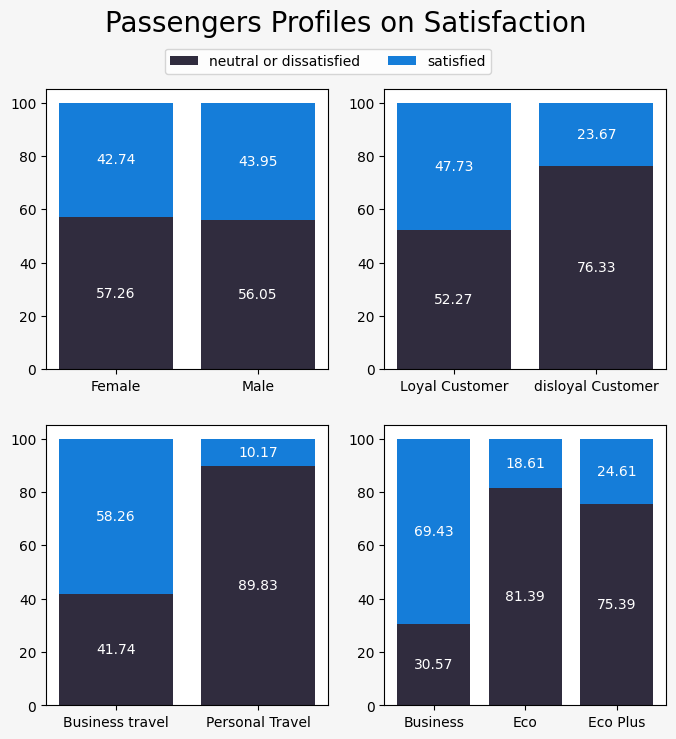

In [42]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8), facecolor = "#f6f6f6")
fig.suptitle("Passengers Profiles on Satisfaction",size = 20)

axs[0,0].bar(gender_satis.index, gender_satis["neutral or dissatisfied"], label = "neutral or dissatisfied", color = "#302c3e")
axs[0,0].bar(gender_satis.index, gender_satis["satisfied"], bottom = gender_satis["neutral or dissatisfied"], label = "satisfied", color = "#157dd9")
axs[0,0].bar_label(axs[0,0].containers[0], label_type='center', color = "white")
axs[0,0].bar_label(axs[0,0].containers[1], label_type='center', color = "white")


axs[0,1].bar(ct_satis.index, ct_satis["neutral or dissatisfied"], label = "neutral or dissatisfied", color = "#302c3e")
axs[0,1].bar(ct_satis.index, ct_satis["satisfied"], bottom = ct_satis["neutral or dissatisfied"], label = "satisfied", color = "#157dd9")
axs[0,1].bar_label(axs[0,1].containers[0], label_type='center', color = "white")
axs[0,1].bar_label(axs[0,1].containers[1], label_type='center', color = "white")

axs[1,0].bar(tt_satis.index, tt_satis["neutral or dissatisfied"], label = "neutral or dissatisfied", color = "#302c3e")
axs[1,0].bar(tt_satis.index, tt_satis["satisfied"], bottom = tt_satis["neutral or dissatisfied"], label = "satisfied", color = "#157dd9")
axs[1,0].bar_label(axs[1,0].containers[0], label_type='center', color = "white")
axs[1,0].bar_label(axs[1,0].containers[1], label_type='center', color = "white")

axs[1,1].bar(class_satis.index, class_satis["neutral or dissatisfied"], label = "neutral or dissatisfied", color = "#302c3e")
axs[1,1].bar(class_satis.index, class_satis["satisfied"], bottom = class_satis["neutral or dissatisfied"], label = "satisfied", color = "#157dd9")
axs[1,1].bar_label(axs[1,1].containers[0], label_type='center', color = "white")
axs[1,1].bar_label(axs[1,1].containers[1], label_type='center', color = "white")

axs[0,0].legend(loc = "center", bbox_to_anchor = (1,1.1), ncol = 2)

In [43]:
passenger1 = [gender_satis, tt_satis, ct_satis, class_satis]

for i in passenger1:
    result = chi2_contingency(i)
    if result[1] < 0.05:
        print(i.index.name + " dependent terhadap kepuasan")
    else:
        print(i.index.name + " independent terhadap kepuasan")

Gender independent terhadap kepuasan
Type of Travel dependent terhadap kepuasan
Customer Type dependent terhadap kepuasan
Class dependent terhadap kepuasan


In [44]:
age_satis = df.groupby("satisfaction")["Age"].describe()
fd_satis = df.groupby("satisfaction")["Flight Distance"].describe()
display(age_satis,fd_satis)

,count,mean,std,min,25%,50%,75%,max
satisfaction,,,,,,,,
neutral or dissatisfied,58878.0,37.566476,16.459885,7.0,25.0,36.0,50.0,85.0
satisfied,45025.0,41.750583,12.767833,7.0,32.0,43.0,51.0,85.0


,count,mean,std,min,25%,50%,75%,max
satisfaction,,,,,,,,
neutral or dissatisfied,58878.0,928.934135,790.451550,31.0,372.0,671.0,1158.0,4983.0
satisfied,45025.0,1530.140255,1128.126574,31.0,526.0,1250.0,2405.0,4983.0


C:\Users\Surya Y. Pratidina\AppData\Local\Temp\ipykernel_9748\3433893583.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


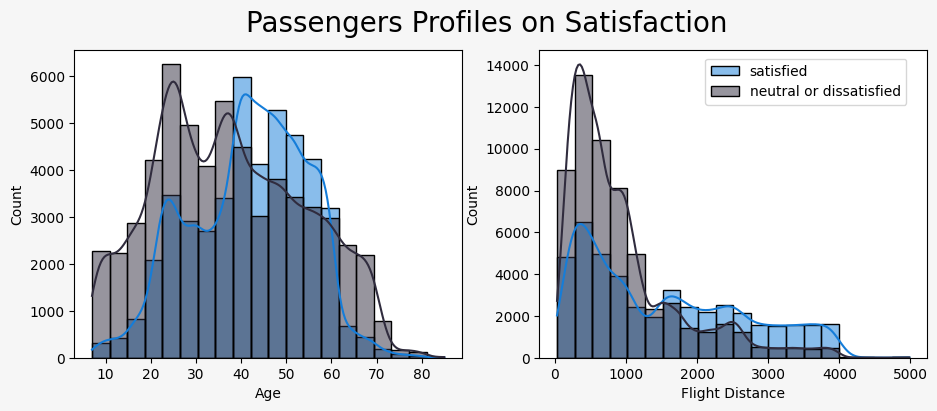

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(11, 4), facecolor = "#f6f6f6")
fig.suptitle("Passengers Profiles on Satisfaction",size = 20)

satis_age = sns.histplot(df[df["satisfaction"] == "satisfied"]["Age"], bins = 20, kde = True, color = "#157dd9", ax = axs[0], label = "satisfied")
satis_age = sns.histplot(df[df["satisfaction"] == "neutral or dissatisfied"]["Age"], bins = 20, kde = True, color = "#302c3e", ax = axs[0], label = "neutral or dissatisfied")

satis_fd = sns.histplot(df[df["satisfaction"] == "satisfied"]["Flight Distance"], bins = 20, kde = True, color = "#157dd9", ax = axs[1])
satis_fd = sns.histplot(df[df["satisfaction"] == "neutral or dissatisfied"]["Flight Distance"], bins = 20, kde = True, color = "#302c3e", ax = axs[1])

fig.legend(loc = "center", ncol = 1, bbox_to_anchor = (0.79,0.8))
fig.show()

In [46]:
passenger2 = ["Age", "Flight Distance"]

for i in passenger2:
    result = mannwhitneyu(df[df["satisfaction"] == "satisfied"][i],
                          df[df["satisfaction"] == "neutral or dissatisfied"][i],
                          alternative = "greater")
    if result[1] < 0.05:
        print("terdapat perbedaaan median " + i + " antara penumpang yang puas dengan penumpang yang tidak puas")
    else:
        print("tidak terdapat perbedaaan median " + i + " antara penumpang yang puas dengan penumpang yang tidak puas")

terdapat perbedaaan median Age antara penumpang yang puas dengan penumpang yang tidak puas
terdapat perbedaaan median Flight Distance antara penumpang yang puas dengan penumpang yang tidak puas


## Insight :
* Dari informasi diatas, didapatkan bahwa gender penumpang memiliki pengaruh yang tidak signifikan terhadap kepuasan penumpang, dengan persentase penumpang laki-laki yang tidak puas adalah 56.05% dan penumpang wanita adalah 57.26%. Hal ini dikonfirmasi oleh test chi squared, dimana variabel Gender independen terhadap kepuasan penumpang
* Didapatkan juga bahwa Penumpang yang loyal memliki presentase penumpang yang tidak puas sebesar 52.27%, lebih kecil dari penumpang yang tidak loyal sebesar (76.33%). Variabel Customer Type dibuktikan dependen terhadap kepuasan penumpang berdasarkan hasil test chi squared.
* Variabel Type of Travel juga terbukti dependen terhadap kepuasan penumpang berdasarkan hasil chi squared. Persentase penumpang yang tidak puas adalah 41.74% dari penumpang yang terbang karena urusan bisnis dan 89.83% dari penumpang yang terbang karena urusan personal.
* Variabel Class juga terbukti dependen dengan kepuasan penumpang berdasarkan hasil chi squared. Persentase penumpang yang tidak puas adalah sebesar 30.57% dari penumpang kelas business, 81,39% dari kelas eco, dan 75,35% dari kelas eco plus.
* Variabel Age miliki median yang berbeda setelah dipisahkan berdasarkan kepuasan. Penumpang yang tidak puas memiliki median 36 tahun sementara penupang yang puas memiliki median 43 tahun. Perbedaan median ini dikonfirmasi dengan uji mann-whitney diamana terdapat perbedaan yang signifikan.
* Yang terakhir, terdapat perbedaan median variabel Flight distance setelah dipisahkan berdasarakn kepuasan penumpang. Penumpang yang puas memiliki median 671 miles sedangkan yang tidak puas memiliki median 1250 miles.

In [47]:
# melihat hubungan antara tipe perjalanan dan kelas penumpang
tt_class = (pd.crosstab( df["Class"], df["Type of Travel"], normalize = "index") *100).round(2)
ct_class = (pd.crosstab( df["Class"], df["Customer Type"], normalize = "index") *100).round(2)

display(tt_class,ct_class)

Type of Travel,Business travel,Personal Travel
Class,,
Business,95.66,4.34
Eco,43.34,56.66
Eco Plus,51.91,48.09


Customer Type,Loyal Customer,disloyal Customer
Class,,
Business,85.19,14.81
Eco,76.66,23.34
Eco Plus,90.46,9.54


C:\Users\Surya Y. Pratidina\AppData\Local\Temp\ipykernel_9748\2752668537.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


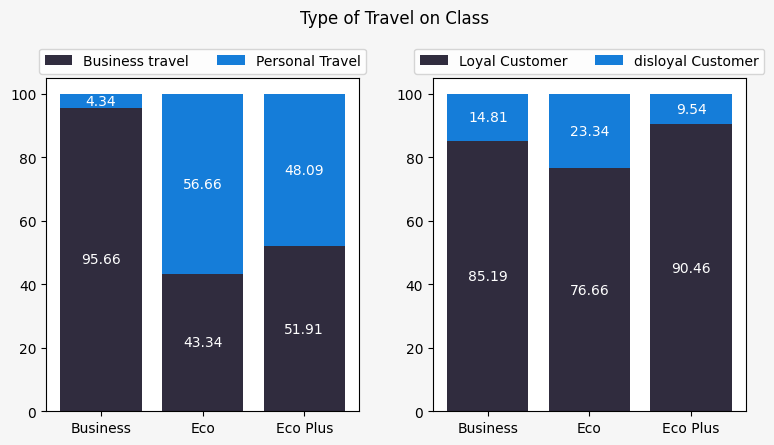

In [48]:
# visual dari yang diatas
fig, axs = plt.subplots(1, 2, figsize=(8,4.5), facecolor = "#f6f6f6")

axs[0].bar(tt_class.index, tt_class["Business travel"], label = "Business travel", color = "#302c3e")
axs[0].bar(tt_class.index, tt_class["Personal Travel"], bottom = tt_class["Business travel"], label = "Personal Travel", color = "#157dd9")
axs[0].bar_label(axs[0].containers[0], label_type='center', color = "white")
axs[0].bar_label(axs[0].containers[1], label_type='center', color = "white")
axs[0].legend(loc = "center", bbox_to_anchor = (0.5,1.05), ncol = 2)

axs[1].bar(ct_class.index, ct_class["Loyal Customer"], label = "Loyal Customer", color = "#302c3e")
axs[1].bar(ct_class.index, ct_class["disloyal Customer"], bottom = ct_class["Loyal Customer"], label = "disloyal Customer", color = "#157dd9")
axs[1].bar_label(axs[1].containers[0], label_type='center', color = "white")
axs[1].bar_label(axs[1].containers[1], label_type='center', color = "white")
axs[1].legend(loc = "center", bbox_to_anchor = (0.5,1.05), ncol = 2)



fig.suptitle("Type of Travel on Class")
fig.tight_layout()
fig.show()

In [49]:
passenger1 = [tt_class, ct_class]

for i in passenger1:
    result = chi2_contingency(i)
    if result[1] < 0.05:
        print(i.columns.name + " dependent terhadap kelas")
    else:
        print(i.columns.name+ " independent terhadap kelas")

Type of Travel dependent terhadap kelas
Customer Type dependent terhadap kelas


In [50]:
age_class = df.groupby("Class")["Age"].describe()
fd_class = df.groupby("Class")["Flight Distance"].describe()

display(age_class,fd_class)

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
Business,49664.0,41.574158,12.753871,7.0,32.0,42.0,51.0,85.0
Eco,46745.0,37.164253,16.752560,7.0,23.0,36.0,50.0,85.0
Eco Plus,7494.0,38.654524,16.614503,7.0,26.0,37.0,51.0,85.0


,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
Business,49664.0,1676.008759,1136.603036,56.0,599.0,1589.0,2556.0,4983.0
Eco,46745.0,743.439748,549.416492,31.0,345.0,599.0,985.0,4983.0
Eco Plus,7494.0,747.125567,579.857640,31.0,337.0,589.0,979.0,4983.0


C:\Users\Surya Y. Pratidina\AppData\Local\Temp\ipykernel_9748\2459697861.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


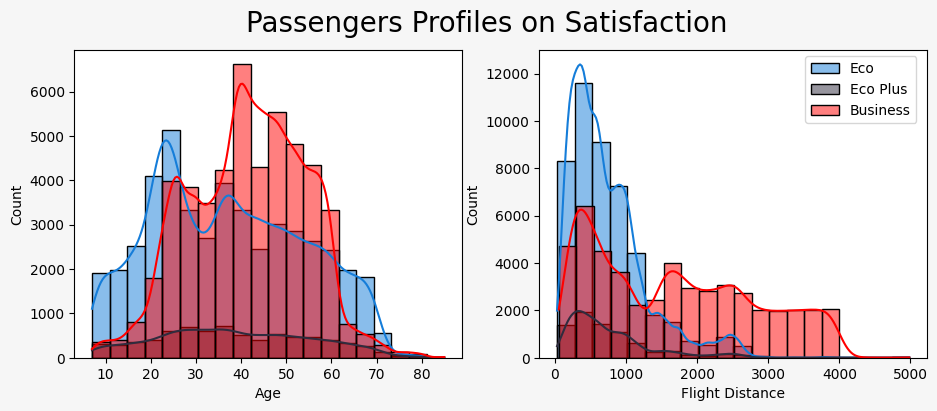

In [51]:
fig, axs = plt.subplots(1, 2, figsize=(11, 4), facecolor = "#f6f6f6")
fig.suptitle("Passengers Profiles on Satisfaction",size = 20)

class_age = sns.histplot(df[df["Class"] == "Eco"]["Age"], bins = 20, kde = True, color = "#157dd9", ax = axs[0], label = "Eco")
class_age = sns.histplot(df[df["Class"] == "Eco Plus"]["Age"], bins = 20, kde = True, color = "#302c3e", ax = axs[0], label = "Eco Plus")
class_age = sns.histplot(df[df["Class"] == "Business"]["Age"], bins = 20, kde = True, color = "r", ax = axs[0], label = "Business")

class_fd = sns.histplot(df[df["Class"] == "Eco"]["Flight Distance"], bins = 20, kde = True, color = "#157dd9", ax = axs[1])
class_fd = sns.histplot(df[df["Class"] == "Eco Plus"]["Flight Distance"], bins = 20, kde = True, color = "#302c3e", ax = axs[1])
class_fd = sns.histplot(df[df["Class"] == "Business"]["Flight Distance"], bins = 20, kde = True, color = "r", ax = axs[1])

fig.legend(loc = "center", ncol = 1, bbox_to_anchor = (0.84,0.78))
fig.show()

In [52]:
passenger2 = ["Age", "Flight Distance"]

for i in passenger2:
    result = kruskal(df[df["Class"] == "Eco"][i],
                     df[df["Class"] == "Eco Plus"][i],
                     df[df["Class"] == "Business"][i])
    if result[1] < 0.05:
        print("terdapat perbedaaan median " + i + " di anatara kelas penerbangan")
    else:
        print("tidak terdapat perbedaaan median " + i + " di anatara kelas penerbangan")

terdapat perbedaaan median Age di anatara kelas penerbangan
terdapat perbedaaan median Flight Distance di anatara kelas penerbangan


In [53]:
df.groupby("Customer Type")[["Flight Distance"]].describe()

Flight Distance                                         \
                            count         mean          std   min    25%   
Customer Type                                                              
Loyal Customer            84922.0  1295.625515  1048.328725  31.0  440.0   
disloyal Customer         18981.0   714.463885   499.871283  31.0  338.0   

                                          
                     50%     75%     max  
Customer Type                             
Loyal Customer     925.0  1979.0  4983.0  
disloyal Customer  598.0   978.0  4963.0

C:\Users\Surya Y. Pratidina\AppData\Local\Temp\ipykernel_9748\229739613.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


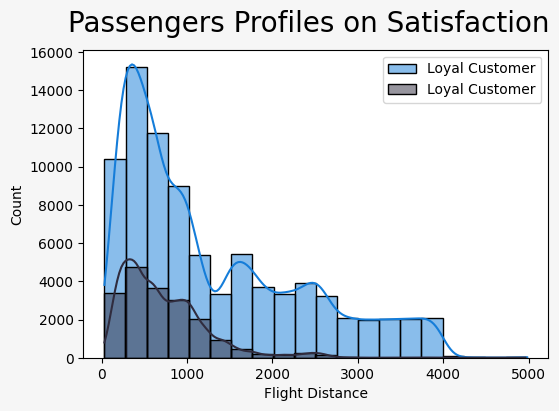

In [54]:
fig, axs = plt.subplots(1, figsize=(6, 4), facecolor = "#f6f6f6")
fig.suptitle("Passengers Profiles on Satisfaction",size = 20)

ct_fd = sns.histplot(df[df["Customer Type"] == "Loyal Customer"]["Flight Distance"], bins = 20, kde = True, color = "#157dd9", label = "Loyal Customer")
ct_fd = sns.histplot(df[df["Customer Type"] == "disloyal Customer"]["Flight Distance"], bins = 20, kde = True, color = "#302c3e", label = "Loyal Customer")

ct_fd.legend(loc = 1, ncol = 1)
fig.show()

In [55]:
result = kruskal(df[df["Customer Type"] == "Loyal Customer"]["Flight Distance"],
                 df[df["Customer Type"] == "disloyal Customer"]["Flight Distance"])
if result[1] < 0.05:
    print("terdapat perbedaaan median jarak terbang di anatara tipe penumpang")
else:
    print("tidak terdapat perbedaaan jarak terbang di anatara tipe penumpang")

terdapat perbedaaan median jarak terbang di anatara tipe penumpang


## Insight :
* Dari grafik **Type of Travel on Class** dapat dilihat bahwa orang yang terbang dengan alasan bisnis lebih memilih kelas business ketimbang kelas eco ata eco plus. hal ini ditunjukan dengan 95.66% penumpang kelas bisnis adalah penumpang yang terbang dengan alasan bisnis. Sementara itu kelas eco dan eco plus hanya diisi masing masing 43.34% dan 51.91% penumpang yang terbang dengan alasan personal. hal ini dikonfirmasi dengan chi squared test yang menunjukan bahwa variabel Type of Travel dependen dengan kepuasan penumpang. Hal ini menunjukan bahwa penumpang yang berpergian dengan alasan bisnis memiliki presentase penumpang yang tidak puas lebih rendah dari pada penumpang yang berpergian dengan alasan personal.
* Median Age dari penumpang yang naik dengan kelas business (42 tahun) lebih tinggi dari dari penumpang kelas eco (36 tahun) dan eco plus (37 tahun). Perbedaan ini telah diuji dengan uji kruskal wallis dengan hasil adanya perbedaan median dari variabel Age setelah dibagi berdasarkan kelas. Hal ini menunjukan penumpang yang terbang dengan kelas bisnis cenderung lebih tua dibandingkan dengan penumpang yang terbang dengan kelas eco dan eco plus.
* Median Flight Distance dari penumpang yang terbang dengan kelas bisnis (1589 miles) juga lebih tinggi dibandingkan kelas eco (599 miles) dan eco plus (589 miles). ni telah diuji dengan uji kruskal wallis dengan hasil adanya perbedaan median dari variabel Flight Distance setelah dibagi berdasarkan kelas. Hal ini menunjukan penumpang yang terbang dengan kelas bisnis cenderung terbang lebih jauh dibandingkan dengan penumpang yang terbang dengan kelas eco dan eco plus.
* Jika dilahat dari seluruh profil penumpang variabel class yang paling berpengaruh terhadap kepuasan penumpang. Kepuasan penumpang yang berjenis kelamin laki-laki dan perempuan terbukti tidak memiliki perbedaan yang signifikan, sementara variabel lain seperti tipe customer, tipe perjalanan, umur, dan jarak tempuh memiliki dependensi dengan variabel class, sehingga kepuasan variabel variabel tersebut didapatkan karena penumpang tersebut berada di kelas mana.
* Dari grafik **Type of Travel on Class**, kita dapat melihat bahwa persentase penumpang yang loyal lebih tinggi di kelas business (85.19%) dan kelas eco plus (90.46%) daripada di kelas eco (76.66%). hal ini menunjukan bahwa penumpang yang loyal lebih memilih dua kelas atas (business dan eco plus) dari pada kelas eco. Hal ini menyebabkan penmpang loyal memiliki presentase kepuasan yang lebih tinggi dari penumpang yang tidak loyal. Dependensi variabel Customer Type dan Class dikonfirmasi melalui test chi sqaured. Hal ini didukung oleh pengecekan median jarak terbang dengan tipe penumpang. Diketahui penuoang yang loyal memiliki median jarak terbang 925 miles, lebih tinggi dari penumpang yang tidak loyal yangh hanya sebesar 598 miles. Hal ini dikonfirmasi oleh test kruskal dimana hasilnya menunjukan terdapat perbedaan median antara kedua tipe penumpang.

## Recomendation :
* Perlu adanya pengecekan penilaian penumpang terhadap layanan berdasarkan kelas untuk melihat mengapa kelas eco dan eco plus mendapatkan presentase kepuasan yang lebih rendah dari penumpang kelas business.

## 5.3 Bagaimana penilaian Penumpang Terhadap Layanan Yang Diberikan?

In [56]:
service = ["Inflight wifi service", "Departure/Arrival time convenient","Ease of Online booking","Gate location","Food and drink","Online boarding",
           "Seat comfort","Inflight entertainment","On-board service","Leg room service","Baggage handling","Checkin service","Inflight service","Cleanliness"]
parameter = True

for i in service:
    types = df.groupby(i)[["id"]].count()
    types.rename({"id" : i}, axis = 1, inplace = True)
    types.index.name = "Service"
    if parameter:
        service_survey = types
        parameter = False
    else:
        service_survey[i] = types

service_survey = service_survey.T
service_survey.fillna(0, inplace = True)
service_survey

Service,0,1,2,3,4,5
Inflight wifi service,3103.0,17839.0,25830.0,25868.0,19794.0,11469.0
Departure/Arrival time convenient,5300.0,15498.0,17191.0,17965.0,25546.0,22403.0
Ease of Online booking,4487.0,17525.0,24021.0,24448.0,19571.0,13851.0
Gate location,1.0,17562.0,19459.0,28576.0,24426.0,13879.0
Food and drink,107.0,12837.0,21988.0,22300.0,24358.0,22313.0
Online boarding,2428.0,10691.0,17505.0,21804.0,30762.0,20713.0
Seat comfort,1.0,12075.0,14897.0,18695.0,31765.0,26470.0
Inflight entertainment,14.0,12478.0,17637.0,19139.0,29422.0,25213.0
On-board service,3.0,11872.0,14681.0,22832.0,30867.0,23648.0
Leg room service,472.0,10353.0,19525.0,20098.0,28788.0,24667.0


In [57]:
for i in service_survey.columns:
    if i == 0:
        total = service_survey[i].copy()
    else:
        total += service_survey[i]

for i in service_survey.columns:
    service_survey[str(i) + "(%)"] = (service_survey[i] / total * 100).round(2)

service_survey

Service,0,1,2,3,4,5,0(%),1(%),2(%),3(%),4(%),5(%)
Inflight wifi service,3103.0,17839.0,25830.0,25868.0,19794.0,11469.0,2.99,17.17,24.86,24.90,19.05,11.04
Departure/Arrival time convenient,5300.0,15498.0,17191.0,17965.0,25546.0,22403.0,5.10,14.92,16.55,17.29,24.59,21.56
Ease of Online booking,4487.0,17525.0,24021.0,24448.0,19571.0,13851.0,4.32,16.87,23.12,23.53,18.84,13.33
Gate location,1.0,17562.0,19459.0,28576.0,24426.0,13879.0,0.00,16.90,18.73,27.50,23.51,13.36
Food and drink,107.0,12837.0,21988.0,22300.0,24358.0,22313.0,0.10,12.35,21.16,21.46,23.44,21.47
Online boarding,2428.0,10691.0,17505.0,21804.0,30762.0,20713.0,2.34,10.29,16.85,20.98,29.61,19.93
Seat comfort,1.0,12075.0,14897.0,18695.0,31765.0,26470.0,0.00,11.62,14.34,17.99,30.57,25.48
Inflight entertainment,14.0,12478.0,17637.0,19139.0,29422.0,25213.0,0.01,12.01,16.97,18.42,28.32,24.27
On-board service,3.0,11872.0,14681.0,22832.0,30867.0,23648.0,0.00,11.43,14.13,21.97,29.71,22.76
Leg room service,472.0,10353.0,19525.0,20098.0,28788.0,24667.0,0.45,9.96,18.79,19.34,27.71,23.74


In [58]:
service_survey["1(%) + 2(%) + 3(%)"] = service_survey["1(%)"] + service_survey["2(%)"] + service_survey["3(%)"]
service_survey.sort_values("1(%) + 2(%) + 3(%)", inplace = True)

C:\Users\Surya Y. Pratidina\AppData\Local\Temp\ipykernel_9748\2775784276.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels([str(x)+"%" for x in np.arange(70,-1,-10)])
C:\Users\Surya Y. Pratidina\AppData\Local\Temp\ipykernel_9748\2775784276.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels([str(x)+"%" for x in np.arange(0,71,10)])
C:\Users\Surya Y. Pratidina\AppData\Local\Temp\ipykernel_9748\2775784276.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2].set_xticklabels(["70%","5%"])
C:\Users\Surya Y. Pratidina\AppData\Local\Temp\ipykernel_9748\2775784276.py:39: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


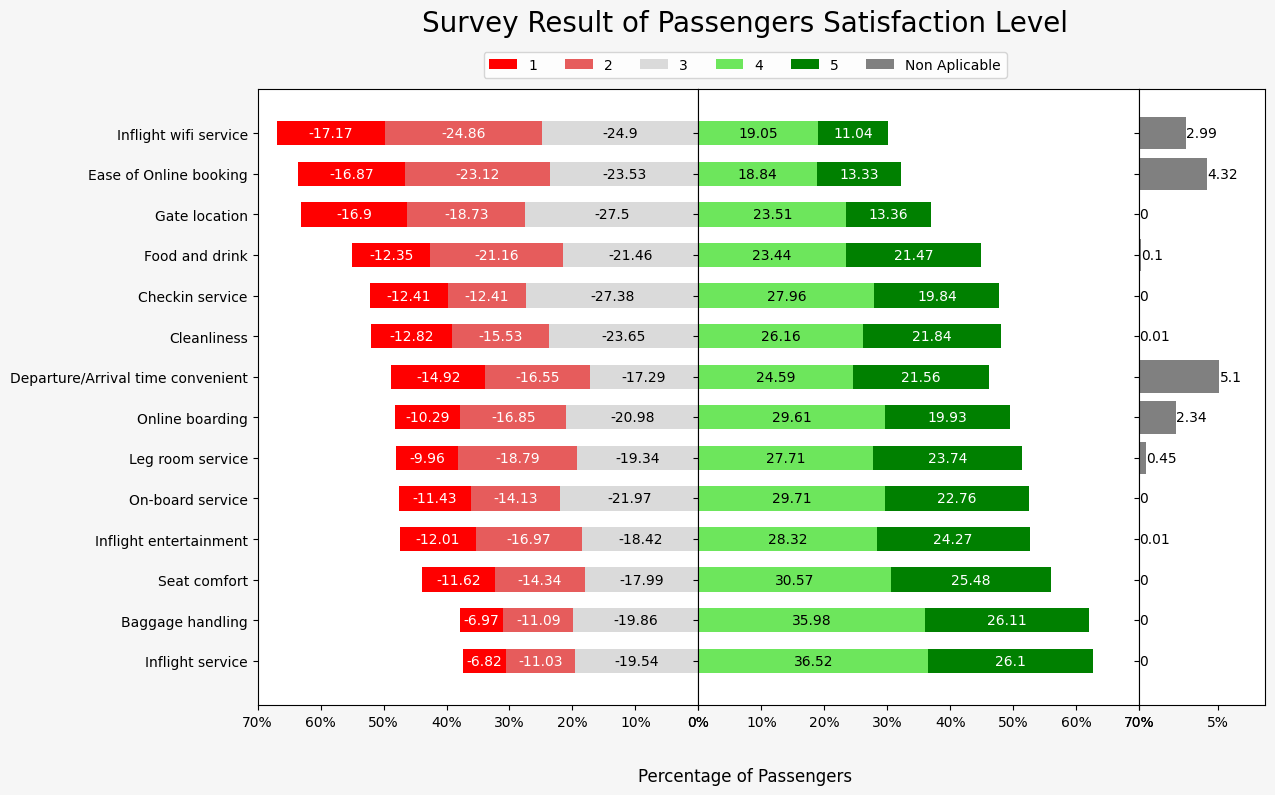

In [59]:
fig = plt.figure(figsize=(13, 8), facecolor = "#f6f6f6")
fig.suptitle("Survey Result of Passengers Satisfaction Level",size = 20)
fig.supxlabel("Percentage of Passengers")

gs = fig.add_gridspec(1, 3, wspace=0, width_ratios=[3.5, 3.5, 1])
axs = gs.subplots(sharex = False, sharey = True)

axs[0].barh(service_survey.index, service_survey["3(%)"] * -1, color = "#DADADA", height = 0.6, label = 3)
axs[0].barh(service_survey.index, service_survey["2(%)"] * -1, left = service_survey["3(%)"] * -1, color = "#E65C5C", height = 0.6, label = 2)
axs[0].barh(service_survey.index, service_survey["1(%)"] * -1, left = (service_survey["3(%)"] + service_survey["2(%)"]) * -1, color = "red", height = 0.6, label = 1)
axs[0].set_xlim([-70,0])
axs[0].set_xticklabels([str(x)+"%" for x in np.arange(70,-1,-10)])
axs[0].bar_label(axs[0].containers[0], label_type='center', color = "black")
axs[0].bar_label(axs[0].containers[1], label_type='center', color = "white")
axs[0].bar_label(axs[0].containers[2], label_type='center', color = "white")
handles0, labels0 = axs[0].get_legend_handles_labels()
handles0 = [handles0[2], handles0[1], handles0[0]]
labels0 = [labels0[2], labels0[1], labels0[0]]


axs[1].barh(service_survey.index, service_survey["4(%)"], color = "#6DE65C", height = 0.6, label = 4)
axs[1].barh(service_survey.index, service_survey["5(%)"], left =  service_survey["4(%)"], color = "green", height = 0.6,  label = 5)
axs[1].set_xlim([0,70])
axs[1].set_xticklabels([str(x)+"%" for x in np.arange(0,71,10)])
axs[1].bar_label(axs[1].containers[0], label_type='center', color = "black")
axs[1].bar_label(axs[1].containers[1], label_type='center', color = "white")
handles1, labels1 = axs[1].get_legend_handles_labels()


axs[2].barh(service_survey.index, service_survey["0(%)"],color = "grey", height = 0.8, label = "Non Aplicable")
axs[2].set_xlim([0,8])
axs[2].set_xticklabels(["70%","5%"])
axs[2].bar_label(axs[2].containers[0], label_type='edge', color = "black")
handles2, labels2 = axs[2].get_legend_handles_labels()

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles0 + handles1 + handles2, labels0 + labels1 + labels2, loc= "center", bbox_to_anchor = (0.5,0.91), ncol = 6)

fig.show()

## Insight :
* Dari seluruh pelayanan yang diberikan `Inflight Wi-Fi Service` adalah pelayanan yang mendapatkan paling banyak penilaian **netral dan buruk** (penilaian 3 kebawah) dengan total , dikuti oleh `Ease of Online Booking` dan `Gate Location`.
* Layanan yang mayoritas mendapatkan **penilaian baik** (penilaian diatas 4) adalah `Leg room service`, `On-board service`, `Inflight entertainment`, `Seat comfort`, `Baggage handling`, dan `Inflight service`. Layanan layanan tersebut harus dipertahankan. 


## Recomendation :
* Perlu adanya pengecekan alasan kenapa beberapa layanan mendapatkan penilaian yang buruk dari penumpang
* Pada layanan yang sudah mendapatkan penilaian yang baik harus dipertahankan atau dinaikan performanya dengan cara : 
    * Leg Room Service : Pertahankan posisi kursi yang sudah ada karena dinilai baik oleh mayoritas penumpang. Bagi penumpang yang masih merasa kurang nyaman bisa diberikan penawaran untuk naik ke kelas ekonomi plus dengan ruang kaki yang lebih besar
    * On-Board Service : Pelyanan On-Board dinilai baik oleh penumpang. Saran yang dapat diberikan adalah memberikan reward kepada petugas boarding agar petugas tersebut tetap semangat dan konsisten dalam memberikan pelayanan kepada penunpang saat boarding. reward dapat berupa bonus uang atau fasilitas tambahan seperti diskon tiket pesawat atau liburan berbayar.
    * Inflight Entertaiment : Layanan hiburan mendapatkan mayoritas nilai puas. Akan tetapi, jika library musik atau film yang ada di pesawat tidak di update maka penumpang akan merasa bosan. Untuk itu perlu adanya penyegaran berkala sehingga hiburan yang dapat dinikmatitetap relevan dengan selera penumpang.
    * Seat Comfort : Seat Comfort juga mendapatkan nilai yang baik dari penumpang. Untul dapat mempertahankan penilaian tersebut, perawatan kursi penumpang harus dijalankan dengan baik sehingga kursi penumnpang tatap memberika kepuasan kepada penumpang.
    * Baggage Handling : Baggage Handling juga diberikan penilaian yang cukup baik. penilaian ini didapatkan karena penumpang merasa puas dengan penanganan barang bawaan mereka. Sama seperti On-Board Service, penilaian baik ini dihasilkan oleh kru di lapangan. Untuk itu kru maskapai juga disarankan untuk diberi reward sehingga mereka tetap bersemangat dalam menjaga dan menangani barang bawaan penumpang.
    * Inflight Service : Penilaian yang mayoritas baik diberikan kepada pramugari-pramugari maskapai sehingga perlu juga adanya reward kepada para pramugari, sehingga mereka tetap bersemangat dalam melayani penumpang.

In [60]:
# melihat perbandinagn layannan berdasarkan kepuasan penumpang

wifi = pd.DataFrame(df[df["satisfaction"] == "satisfied"].groupby("Inflight wifi service")["id"].count())
wifi.rename({"id" : "Number of Passenger (satisfied)"}, axis = 1, inplace = True)
wifi["Number of Passenger (neutral or dissatisfied)"] = df[df["satisfaction"] == "neutral or dissatisfied"].groupby("Inflight wifi service")["id"].count()
wifi["Number of Passenger (Business class)"] = df[df["Class"] == "Business"].groupby("Inflight wifi service")["id"].count()
wifi["Number of Passenger (Eco Plus class)"] = df[df["Class"] == "Eco Plus"].groupby("Inflight wifi service")["id"].count()
wifi["Number of Passenger (Eco class)"] = df[df["Class"] == "Eco"].groupby("Inflight wifi service")["id"].count()


wifi = wifi.T


for i in wifi.columns:
    if i == 0:
        total = wifi[i].copy()
    else:
        total += wifi[i]

for i in wifi.columns:
    wifi[str(i) + "(%)"] = (wifi[i] / total * 100).round(2)

wifi1 = wifi.loc[["Number of Passenger (satisfied)", "Number of Passenger (neutral or dissatisfied)"]]
wifi2 = wifi.loc[["Number of Passenger (Business class)", "Number of Passenger (Eco Plus class)", "Number of Passenger (Eco class)"]]

C:\Users\Surya Y. Pratidina\AppData\Local\Temp\ipykernel_9748\1031505890.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


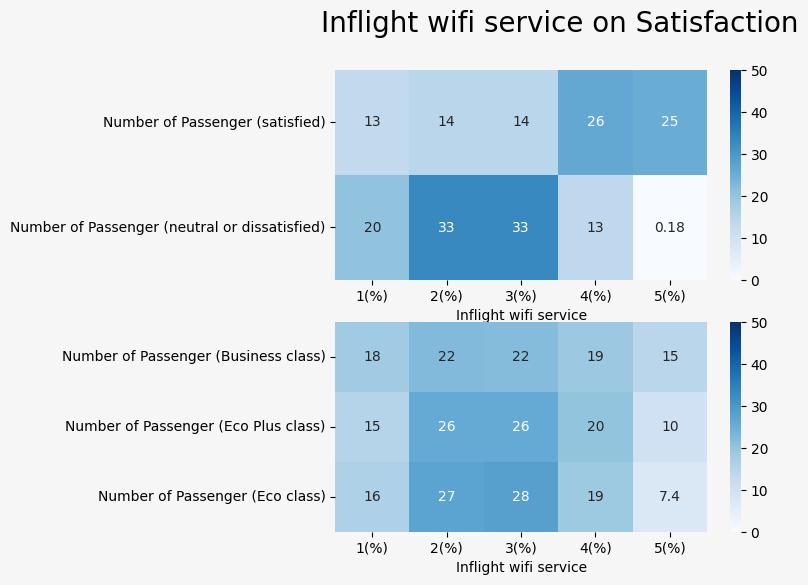

In [61]:
fig, axs = plt.subplots(2, 1, figsize=(6, 6), facecolor = "#f6f6f6")
fig.suptitle("Inflight wifi service on Satisfaction",size = 20)

sns.heatmap(wifi1[["1(%)", "2(%)", "3(%)", "4(%)", "5(%)"]], annot=True, vmin = 0, vmax = 50, cmap="Blues", ax = axs[0])
sns.heatmap(wifi2[["1(%)", "2(%)", "3(%)", "4(%)", "5(%)"]], annot=True, vmin = 0, vmax = 50, cmap="Blues", ax = axs[1])

fig.show()

## Insight :
* Dapat dilihat bahwa persentase penumpang yang puas dan memberi nilai baik (4 dan 5) pada inflight service lebih tinggi dari yang tidak puas. Sementara itu penumpang yang tidak puas cenderung memeberikan penilaian netral atau buruk kepada pelayana wi-fi di pesawat. Hal ini menunjukan bahwa baik atau tidaknya pelayanan wi-fi dapat mempengaruhi kepuasan penumpang.
* dapat dilihat juga penumpang yang naik di kelas bisnis, ekonomi plus maupun kelas ekonomi semuanya cenderung memberikan penilaian buruk (3 kebawah) pada pelayan wi-fi.
## Recomendation :
* penilaian yang buruk kepada pelayan wi-fi menunjukan perlunya pembenahan layanan pada seluruh kelas di maskapai.

In [62]:
# melihat perbandinagn layannan berdasarkan kepuasan penumpang

book = pd.DataFrame(df[df["satisfaction"] == "satisfied"].groupby("Ease of Online booking")["id"].count())
book.rename({"id" : "Number of Passenger (satisfied)"}, axis = 1, inplace = True)
book["Number of Passenger (neutral or dissatisfied)"] = df[df["satisfaction"] == "neutral or dissatisfied"].groupby("Ease of Online booking")["id"].count()
book["Number of Passenger (Business class)"] = df[df["Class"] == "Business"].groupby("Ease of Online booking")["id"].count()
book["Number of Passenger (Eco Plus class)"] = df[df["Class"] == "Eco Plus"].groupby("Ease of Online booking")["id"].count()
book["Number of Passenger (Eco class)"] = df[df["Class"] == "Eco"].groupby("Ease of Online booking")["id"].count()


book = book.T


for i in book.columns:
    if i == 0:
        total = book[i].copy()
    else:
        total += book[i]

for i in wifi.columns:
    book[str(i) + "(%)"] = (book[i] / total * 100).round(2)

wifi1 = book.loc[["Number of Passenger (satisfied)", "Number of Passenger (neutral or dissatisfied)"]]
wifi2 = book.loc[["Number of Passenger (Business class)", "Number of Passenger (Eco Plus class)", "Number of Passenger (Eco class)"]]

C:\Users\Surya Y. Pratidina\AppData\Local\Temp\ipykernel_9748\3916623110.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


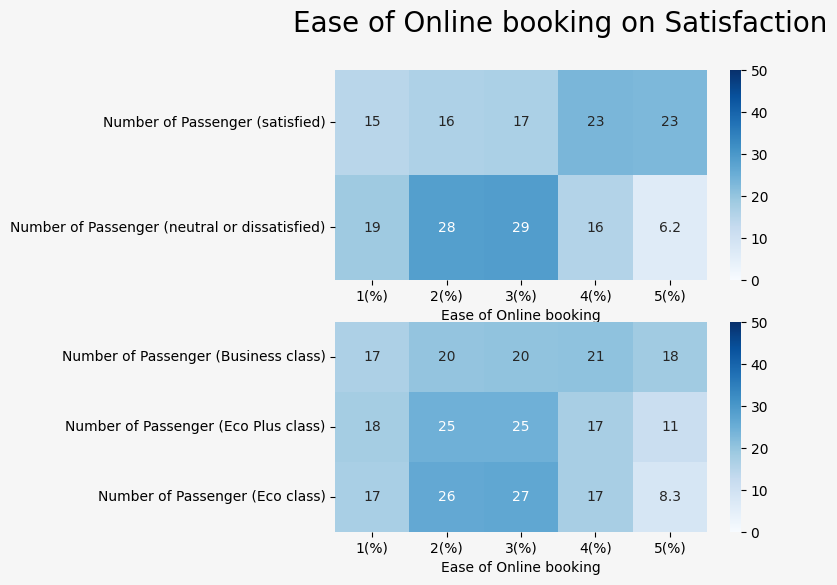

In [63]:
fig, axs = plt.subplots(2, 1, figsize=(6, 6), facecolor = "#f6f6f6")
fig.suptitle("Ease of Online booking on Satisfaction",size = 20)

sns.heatmap(wifi1[["1(%)", "2(%)", "3(%)", "4(%)", "5(%)"]], annot=True, vmin = 0, vmax = 50, cmap="Blues", ax = axs[0])
sns.heatmap(wifi2[["1(%)", "2(%)", "3(%)", "4(%)", "5(%)"]], annot=True, vmin = 0, vmax = 50, cmap="Blues", ax = axs[1])

fig.show()

## Insight : 
* Penumpang yang puas cenderung untuk memberikan penilaian baik (4 ke atas) kepada layanan booking online. sementara itu, penumpang yang tidak puas cenderung untuk memberikan penilaian buruk (3 ke bawah) kepada layanan booking online.
* Pada semua kelas, diketahui bahwa penumpang cenderung memberikan penilaian buruk (3 ke bawah) kepada layanan booking online.

## Recomendation :
* Perlu adanya pembenahan kepada layanan booking online karena hal ini mempengaruhi kepuasan penumpang.

In [64]:
# melihat perbandinagn layannan berdasarkan kepuasan penumpang

gate = pd.DataFrame(df[df["satisfaction"] == "satisfied"].groupby("Gate location")["id"].count())
gate.rename({"id" : "Number of Passenger (satisfied)"}, axis = 1, inplace = True)
gate["Number of Passenger (neutral or dissatisfied)"] = df[df["satisfaction"] == "neutral or dissatisfied"].groupby("Gate location")["id"].count()
gate["Number of Passenger (Business class)"] = df[df["Class"] == "Business"].groupby("Gate location")["id"].count()
gate["Number of Passenger (Eco Plus class)"] = df[df["Class"] == "Eco Plus"].groupby("Gate location")["id"].count()
gate["Number of Passenger (Eco class)"] = df[df["Class"] == "Eco"].groupby("Gate location")["id"].count()
gate.fillna(0, inplace = True)


gate = gate.T

for i in gate.columns:
    if i == 0:
        total = gate[i].copy()
    else:
        total += gate[i]

for i in gate.columns:
    gate[str(i) + "(%)"] = (gate[i] / total * 100).round(2)

wifi1 = gate.loc[["Number of Passenger (satisfied)", "Number of Passenger (neutral or dissatisfied)"]]
wifi2 = gate.loc[["Number of Passenger (Business class)", "Number of Passenger (Eco Plus class)", "Number of Passenger (Eco class)"]]

C:\Users\Surya Y. Pratidina\AppData\Local\Temp\ipykernel_9748\420790628.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


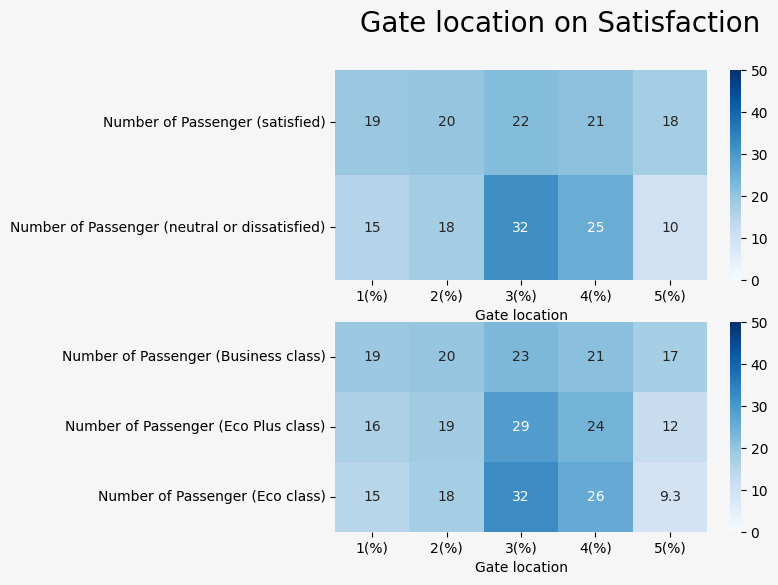

In [65]:
fig, axs = plt.subplots(2, 1, figsize=(6, 6), facecolor = "#f6f6f6")
fig.suptitle("Gate location on Satisfaction",size = 20)

sns.heatmap(wifi1[["1(%)", "2(%)", "3(%)", "4(%)", "5(%)"]], annot=True, vmin = 0, vmax = 50, cmap="Blues", ax = axs[0])
sns.heatmap(wifi2[["1(%)", "2(%)", "3(%)", "4(%)", "5(%)"]], annot=True, vmin = 0, vmax = 50, cmap="Blues", ax = axs[1])

fig.show()

## Insight : 
* Persentase penumpang yang puas pada setiap penilaian lokasi pintu hampir setera. Sementara itu penumpang yang tidak puas cenderung memberikan nilai 4 atau 3 kepada lokasi pintu.
* Dapat dilihat penumpang kelas bisnis meberikan jawaban yang beragam kepada penilaian lokasi pintu, sementara itu penumpang kelas ekonomi dan ekonomi plus cenderunng memberikan penilaian 3 atau 4 kepada lokasi pintu.

## Recomendation :
* Lokasi pintu diasumsikan tidak mempengaruhi kepuasan penumpang. Boleh saja mengganti lokasi pintu agar penilaian kelas bisnis naik, tetapi jangan jadikan hal utama dalam upaya meningkatkan kepuasan penumpang.

In [66]:
# melihat perbandinagn layannan berdasarkan kepuasan penumpang

food = pd.DataFrame(df[df["satisfaction"] == "satisfied"].groupby("Food and drink")["id"].count())
food.rename({"id" : "Number of Passenger (satisfied)"}, axis = 1, inplace = True)
food["Number of Passenger (neutral or dissatisfied)"] = df[df["satisfaction"] == "neutral or dissatisfied"].groupby("Food and drink")["id"].count()
food["Number of Passenger (Business class)"] = df[df["Class"] == "Business"].groupby("Food and drink")["id"].count()
food["Number of Passenger (Eco Plus class)"] = df[df["Class"] == "Eco Plus"].groupby("Food and drink")["id"].count()
food["Number of Passenger (Eco class)"] = df[df["Class"] == "Eco"].groupby("Food and drink")["id"].count()
food.fillna(0, inplace = True)


food = food.T

for i in food.columns:
    if i == 0:
        total = food[i].copy()
    else:
        total += food[i]

for i in food.columns:
    food[str(i) + "(%)"] = (food[i] / total * 100).round(2)

wifi1 = food.loc[["Number of Passenger (satisfied)", "Number of Passenger (neutral or dissatisfied)"]]
wifi2 = food.loc[["Number of Passenger (Business class)", "Number of Passenger (Eco Plus class)", "Number of Passenger (Eco class)"]]

C:\Users\Surya Y. Pratidina\AppData\Local\Temp\ipykernel_9748\1033105310.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


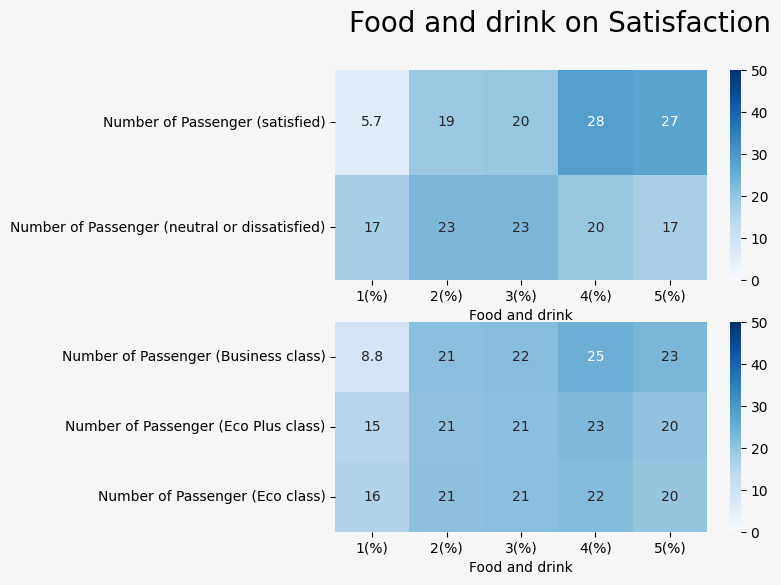

In [67]:
fig, axs = plt.subplots(2, 1, figsize=(6, 6), facecolor = "#f6f6f6")
fig.suptitle("Food and drink on Satisfaction",size = 20)

sns.heatmap(wifi1[["1(%)", "2(%)", "3(%)", "4(%)", "5(%)"]], annot=True, vmin = 0, vmax = 50, cmap="Blues", ax = axs[0])
sns.heatmap(wifi2[["1(%)", "2(%)", "3(%)", "4(%)", "5(%)"]], annot=True, vmin = 0, vmax = 50, cmap="Blues", ax = axs[1])

fig.show()

## Insight : 
* Penumpang yang puas cenderung memberikan penilaian yang baik (4 ke atas) kepada makanan dan miniman maskapai. sementara itu penumpang yang tidak puas memberikan penilaian yang buruk (3 ke bawah) kepada konsumsi yang diberikan.
* Penumpang kelas bisnis cenderung memberikan penilaian yang bervariasi kepada makanan, sementara itu penumpang kelas ekonomi dan ekonomi plus cenderung memberikan penilaian diantara 2, 3, atau 4.

## Recomendation :
* Perlu adanya perbaikan kualitas konsumsi penumpang karena dapat mempengaruhi kepuasan penumpang.

In [68]:
check = pd.DataFrame(df[df["satisfaction"] == "satisfied"].groupby("Checkin service")["id"].count())
check.rename({"id" : "Number of Passenger (satisfied)"}, axis = 1, inplace = True)
check["Number of Passenger (neutral or dissatisfied)"] = df[df["satisfaction"] == "neutral or dissatisfied"].groupby("Checkin service")["id"].count()
check["Number of Passenger (Business class)"] = df[df["Class"] == "Business"].groupby("Checkin service")["id"].count()
check["Number of Passenger (Eco Plus class)"] = df[df["Class"] == "Eco Plus"].groupby("Checkin service")["id"].count()
check["Number of Passenger (Eco class)"] = df[df["Class"] == "Eco"].groupby("Checkin service")["id"].count()
check.fillna(0, inplace = True)

check = check.T
check[0] = [0,0,0,0,0]
check = check[[0,1,2,3,4,5]]

for i in check.columns:
    if i == 0:
        total = check[i].copy()
    else:
        total += check[i]

for i in check.columns:
    check[str(i) + "(%)"] = (check[i] / total * 100).round(2)

wifi1 = check.loc[["Number of Passenger (satisfied)", "Number of Passenger (neutral or dissatisfied)"]]
wifi2 = check.loc[["Number of Passenger (Business class)", "Number of Passenger (Eco Plus class)", "Number of Passenger (Eco class)"]] 

C:\Users\Surya Y. Pratidina\AppData\Local\Temp\ipykernel_9748\3649977238.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


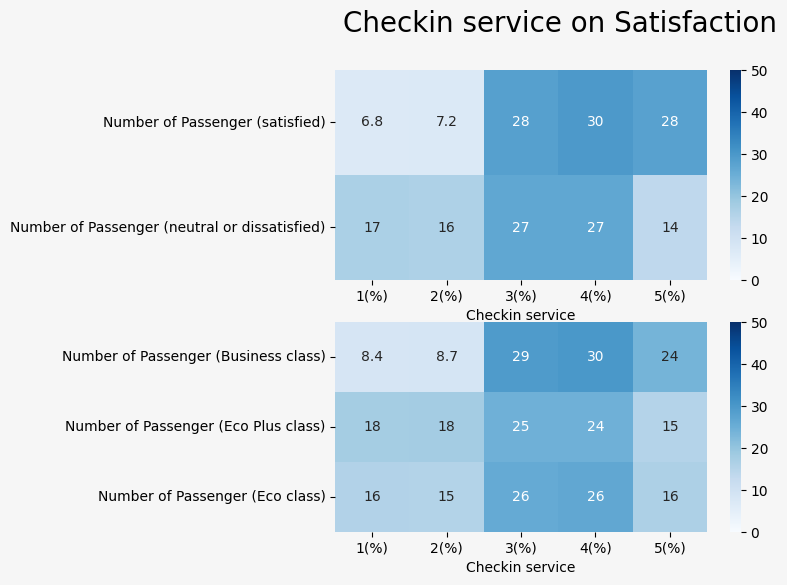

In [69]:
fig, axs = plt.subplots(2, 1, figsize=(6, 6), facecolor = "#f6f6f6")
fig.suptitle("Checkin service on Satisfaction",size = 20)

sns.heatmap(wifi1[["1(%)", "2(%)", "3(%)", "4(%)", "5(%)"]], annot=True, vmin = 0, vmax = 50, cmap="Blues", ax = axs[0])
sns.heatmap(wifi2[["1(%)", "2(%)", "3(%)", "4(%)", "5(%)"]], annot=True, vmin = 0, vmax = 50, cmap="Blues", ax = axs[1])

fig.show()

## Insight : 
* Penumpang yang puas kebanyakan memberikan penilaian posotif (4 ke atas) kepada pelayanan check-in. Penumpang yang tidak puas memberikan jawaban netral (3 atau 4) pada penilaian pelayanan check-in.
* Penumpang kelas bisnis cenderung memberikan jawaban positif pada pelayanan check-in, akan tetapi penumpang kelas ekonomi dan ekonomi plus persentasenya cukup bervariasi pada setiap jawabannya.

## Recomendation :
* Perbaikan pelayan check-in dapat dilakukan untuk meningkatkan kepuasan penumpang, akan tetapi jangan dijadikan sebagai hal utama dalam tindakan untuk meningkatkan kepuasan penumpang.
* Perbaikan pelyanan Check-in utamanya dilakukan pada kelas ekonomi dan ekonomi Plus.

In [70]:
# melihat perbandinagn layannan berdasarkan kepuasan penumpang

clean = pd.DataFrame(df[df["satisfaction"] == "satisfied"].groupby("Cleanliness")["id"].count())
clean.rename({"id" : "Number of Passenger (satisfied)"}, axis = 1, inplace = True)
clean["Number of Passenger (neutral or dissatisfied)"] = df[df["satisfaction"] == "neutral or dissatisfied"].groupby("Cleanliness")["id"].count()
clean["Number of Passenger (Business class)"] = df[df["Class"] == "Business"].groupby("Cleanliness")["id"].count()
clean["Number of Passenger (Eco Plus class)"] = df[df["Class"] == "Eco Plus"].groupby("Cleanliness")["id"].count()
clean["Number of Passenger (Eco class)"] = df[df["Class"] == "Eco"].groupby("Cleanliness")["id"].count()


clean = clean.T
clean[0] = [0,0,0,0,0]
clean = clean[[0,1,2,3,4,5]]

for i in clean.columns:
    if i == 0:
        total = clean[i].copy()
    else:
        total += clean[i]

for i in clean.columns:
    clean[str(i) + "(%)"] = (clean[i] / total * 100).round(2)

wifi1 = clean.loc[["Number of Passenger (satisfied)", "Number of Passenger (neutral or dissatisfied)"]]
wifi2 = clean.loc[["Number of Passenger (Business class)", "Number of Passenger (Eco Plus class)", "Number of Passenger (Eco class)"]]

C:\Users\Surya Y. Pratidina\AppData\Local\Temp\ipykernel_9748\3615333136.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


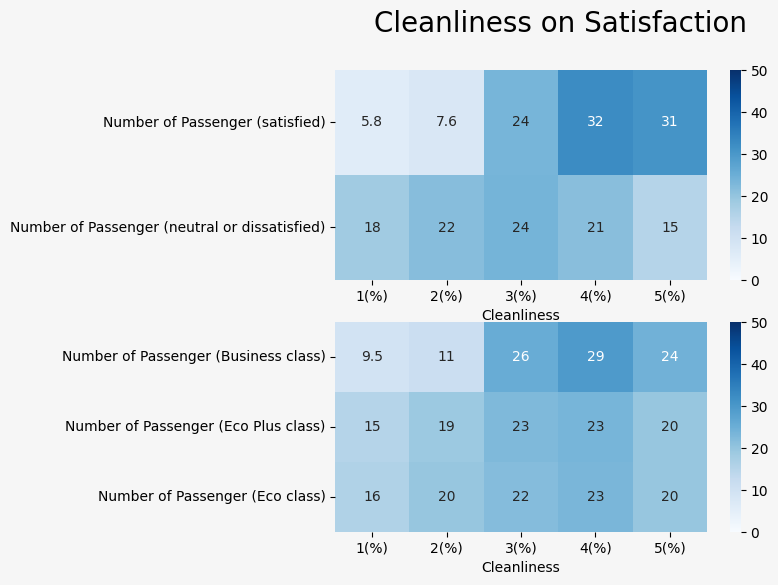

In [71]:
fig, axs = plt.subplots(2, 1, figsize=(6, 6), facecolor = "#f6f6f6")
fig.suptitle("Cleanliness on Satisfaction",size = 20)

sns.heatmap(wifi1[["1(%)", "2(%)", "3(%)", "4(%)", "5(%)"]], annot=True, vmin = 0, vmax = 50, cmap="Blues", ax = axs[0])
sns.heatmap(wifi2[["1(%)", "2(%)", "3(%)", "4(%)", "5(%)"]], annot=True, vmin = 0, vmax = 50, cmap="Blues", ax = axs[1])

fig.show()

## Insight : 
* Penumpang yang puas kebanyakan memberikan penilaian posotif (4 ke atas) kepada kebersihan maskapai. Penumpang yang tidak puas memberikan jawaban yang beragam pada penilaian kebersihan maskapai.
* Penumpang kelas bisnis cenderung memberikan jawaban positif pada kebersihan maskapai, akan tetapi penumpang kelas ekonomi dan ekonomi plus persentasenya cukup bervariasi pada setiap jawabannya.

## Recomendation :
* Perbaikan kebersihan maskapai dapat dilakukan untuk meningkatkan kepuasan penumpang.
* Perbaikan kebersihan maskapai utamanya dilakukan pada kelas ekonomi dan ekonomi Plus.

In [72]:
# melihat perbandinagn layannan berdasarkan kepuasan penumpang

time = pd.DataFrame(df[df["satisfaction"] == "satisfied"].groupby("Departure/Arrival time convenient")["id"].count())
time.rename({"id" : "Number of Passenger (satisfied)"}, axis = 1, inplace = True)
time["Number of Passenger (neutral or dissatisfied)"] = df[df["satisfaction"] == "neutral or dissatisfied"].groupby("Departure/Arrival time convenient")["id"].count()
time["Number of Passenger (Business class)"] = df[df["Class"] == "Business"].groupby("Departure/Arrival time convenient")["id"].count()
time["Number of Passenger (Eco Plus class)"] = df[df["Class"] == "Eco Plus"].groupby("Departure/Arrival time convenient")["id"].count()
time["Number of Passenger (Eco class)"] = df[df["Class"] == "Eco"].groupby("Departure/Arrival time convenient")["id"].count()


time = time.T


for i in time.columns:
    if i == 0:
        total = time[i].copy()
    else:
        total += time[i]

for i in time.columns:
    time[str(i) + "(%)"] = (time[i] / total * 100).round(2)

wifi1 = time.loc[["Number of Passenger (satisfied)", "Number of Passenger (neutral or dissatisfied)"]]
wifi2 = time.loc[["Number of Passenger (Business class)", "Number of Passenger (Eco Plus class)", "Number of Passenger (Eco class)"]] 

C:\Users\Surya Y. Pratidina\AppData\Local\Temp\ipykernel_9748\3876149190.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


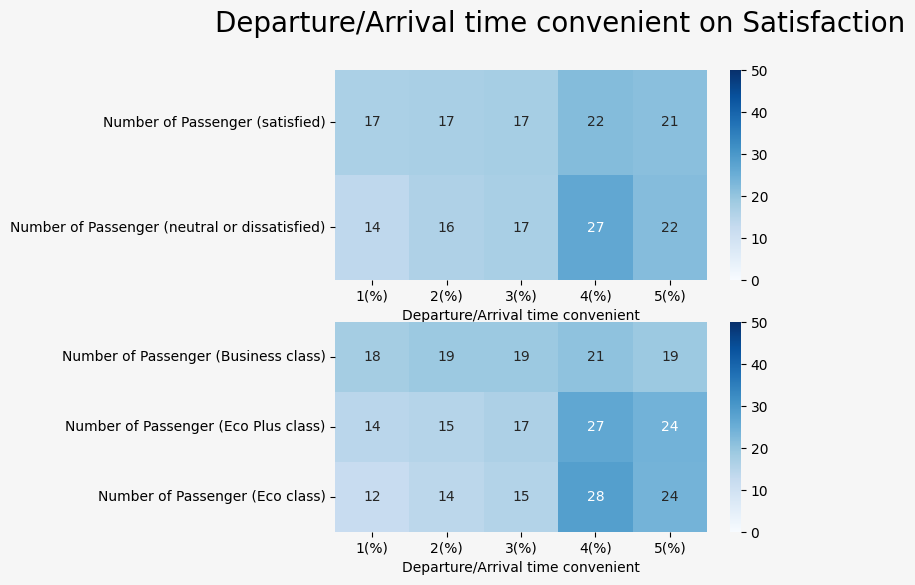

In [73]:
fig, axs = plt.subplots(2, 1, figsize=(6, 6), facecolor = "#f6f6f6")
fig.suptitle("Departure/Arrival time convenient on Satisfaction",size = 20)

sns.heatmap(wifi1[["1(%)", "2(%)", "3(%)", "4(%)", "5(%)"]], annot=True, vmin = 0, vmax = 50, cmap="Blues", ax = axs[0])
sns.heatmap(wifi2[["1(%)", "2(%)", "3(%)", "4(%)", "5(%)"]], annot=True, vmin = 0, vmax = 50, cmap="Blues", ax = axs[1])

fig.show()

## Insight : 
* Penumpang yang puas dan yang tidak puas sama-sama cenderung memberikan jawaban yang positif kepada penilaian kepada ketapan waktu berangkat dan tiba
* Penumpang kelas bisnis memberikan jawaban yang bervariasi kepada penilaian kepada ketapan waktu berangkat dan tiba, berbeda dengan dengan jawaban yang diberikan oleh penumpang kelas ekonomi dan ekonomi plus, dimana jawaban yang diberikan cenderung baik(4 dan 5).
* Hal ini dapat terjadi karena penumpang kelas bisnis kebanyakan berasal dari penumpang yang berpergian dengan alasan bisnis. Bagi orang yang berpergian dengan alasan bisnis ketepatan waktu dapat sangat penting.
## Recomendation :
* Dari ketepatan waktu berangkat dan tiba sudah dinilai baik oleh penumpang maskapai, baik yang puas maupun yang tidak puas. Alasan ketepatan waktu sangat penting bagi penumpang kelas bisnis bisa menjadi alasan untuk memperbaiki menejemen waktu maskapai kedepannya, hanya saja bukan hal yang utama dalam meningkatkan kepuasan penumpang.

In [74]:
# melihat perbandinagn layannan berdasarkan kepuasan penumpang

ob = pd.DataFrame(df[df["satisfaction"] == "satisfied"].groupby("Online boarding")["id"].count())
ob.rename({"id" : "Number of Passenger (satisfied)"}, axis = 1, inplace = True)
ob["Number of Passenger (neutral or dissatisfied)"] = df[df["satisfaction"] == "neutral or dissatisfied"].groupby("Online boarding")["id"].count()
ob["Number of Passenger (Business class)"] = df[df["Class"] == "Business"].groupby("Online boarding")["id"].count()
ob["Number of Passenger (Eco Plus class)"] = df[df["Class"] == "Eco Plus"].groupby("Online boarding")["id"].count()
ob["Number of Passenger (Eco class)"] = df[df["Class"] == "Eco"].groupby("Online boarding")["id"].count()


ob = ob.T


for i in ob.columns:
    if i == 0:
        total = ob[i].copy()
    else:
        total += ob[i]

for i in ob.columns:
    ob[str(i) + "(%)"] = (ob[i] / total * 100).round(2)

wifi1 = ob.loc[["Number of Passenger (satisfied)", "Number of Passenger (neutral or dissatisfied)"]]
wifi2 = ob.loc[["Number of Passenger (Business class)", "Number of Passenger (Eco Plus class)", "Number of Passenger (Eco class)"]]

C:\Users\Surya Y. Pratidina\AppData\Local\Temp\ipykernel_9748\2291284969.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


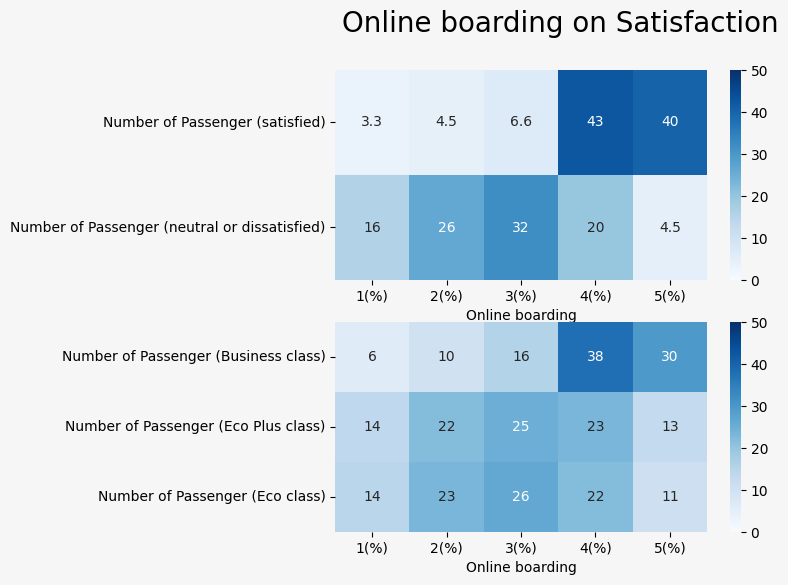

In [75]:
fig, axs = plt.subplots(2, 1, figsize=(6, 6), facecolor = "#f6f6f6")
fig.suptitle("Online boarding on Satisfaction",size = 20)

sns.heatmap(wifi1[["1(%)", "2(%)", "3(%)", "4(%)", "5(%)"]], annot=True, vmin = 0, vmax = 50, cmap="Blues", ax = axs[0])
sns.heatmap(wifi2[["1(%)", "2(%)", "3(%)", "4(%)", "5(%)"]], annot=True, vmin = 0, vmax = 50, cmap="Blues", ax = axs[1])

fig.show()

## Insight : 
* Penumpang yang puas kebanyakan memberikan penilaian posotif (4 ke atas) kepada boarding online. Penumpang yang tidak puas memberikan jawaban netral (3 atau 4) pada penilaian boarding online.
* Penumpang kelas bisnis cenderung memberikan jawaban positif pada pelayanan boarding online, akan tetapi penumpang kelas ekonomi dan ekonomi plus cenderung memberikan jawaban netral (2, 3, dan 4) pada jawabanya.

## Recomendation :
* Perbaikan pelayanan boarding online dibutuhkan karena dapat mempengaruhi kepuasan pelanggan.
* perbaikan tersebut dapat difokuskan pada kelas ekonomi dan ekonomi plus, karena penilaian penumpang kelas bisnis sudah cukup baik untuk layanan online boarding.

## 5.4 Bagaimana Keterlambatan Mempengaruhi Kepuasan Penumpang?

In [76]:
df_dd = df[["Departure Delay in Minutes"]].describe().T

df_ad = df[["Arrival Delay in Minutes"]].describe().T

display(df_dd,df_ad)

,count,mean,std,min,25%,50%,75%,max
Departure Delay in Minutes,103903.0,14.811382,38.206687,0.0,0.0,0.0,12.0,1592.0


,count,mean,std,min,25%,50%,75%,max
Arrival Delay in Minutes,103903.0,15.232573,38.777161,0.0,0.0,0.0,13.0,1584.0


In [77]:
# mencaari presentase jumlah penumpang yang menglamai delay keberangkatan
delayed_dd = (df[df["Departure Delay in Minutes"] > 0]["Departure Delay in Minutes"].count() / df["Departure Delay in Minutes"].count() * 100).round(2)

# mencaari presentase jumlah penumpang yang menglamai delay kedatangan
delayed_ad = (df[df["Arrival Delay in Minutes"] > 0]["Arrival Delay in Minutes"].count() / df["Arrival Delay in Minutes"].count() * 100).round(2)

print(f"Presentase penumapang yang mengalami keterlambatan keberangkatan adalah {delayed_dd}%. Sementara itu, penumpang yang mengalami keterlambatan kedatangan adalah {delayed_ad}% dari total keseluruhan penumpang")

Presentase penumapang yang mengalami keterlambatan keberangkatan adalah 43.54%. Sementara itu, penumpang yang mengalami keterlambatan kedatangan adalah 43.88% dari total keseluruhan penumpang


In [78]:
# melihat apakah keterlambatan mempengaruhi kepuasan kepada penumpang
df_dd_ad_satisfaction = df[["satisfaction"]].copy()
df_dd_ad_satisfaction["Departure Status"] = df["Departure Delay in Minutes"].apply(lambda x : "On Time" if x == 0 else "Delayed")
df_dd_ad_satisfaction["Arrival Status"] = df["Arrival Delay in Minutes"].apply(lambda x : "On Time" if x == 0 else "Delayed")
df_dd_ad_satisfaction.head()

,satisfaction,Departure Status,Arrival Status
0,neutral or dissatisfied,Delayed,Delayed
1,neutral or dissatisfied,Delayed,Delayed
2,satisfied,On Time,On Time
3,neutral or dissatisfied,Delayed,Delayed
4,satisfied,On Time,On Time


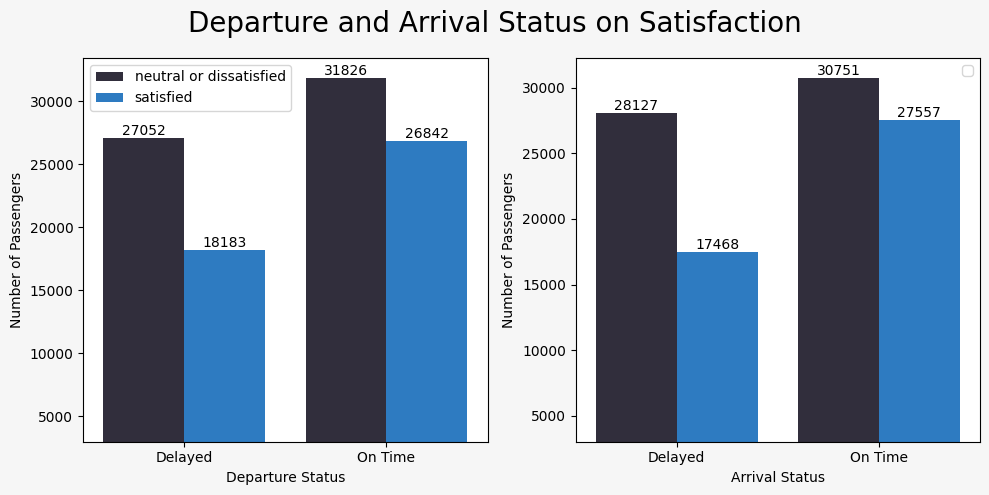

In [79]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), facecolor = "#f6f6f6")
fig.suptitle("Departure and Arrival Status on Satisfaction",size = 20)

count_dd = sns.countplot(data = df_dd_ad_satisfaction, x = "Departure Status", hue = "satisfaction", ax = axs[0], palette = ["#302c3e", "#157dd9"])
count_dd.bar_label(count_dd.containers[0])
count_dd.bar_label(count_dd.containers[1])
count_dd.set_ylabel("Number of Passengers")
count_dd.legend(loc = 2)
count_dd.set_ylim(3000)

count_ad = sns.countplot(data = df_dd_ad_satisfaction, x = "Arrival Status", hue = "satisfaction", ax = axs[1], palette = ["#302c3e", "#157dd9"])
count_ad.bar_label(count_ad.containers[0])
count_ad.bar_label(count_ad.containers[1])
count_ad.set_ylabel("Number of Passengers")
count_ad.legend("")
count_ad.set_ylim(3000)


fig.tight_layout()

## Insight : 
* Keterlambatan keberangkatan dan kedatangan miliki nilai tengah atau median 0 menit, dengan range 0 menit sampai 1592 menit untuk keberangakatan dan 1584 menit untuk kedatangan.'
* Presentase penumapang yang mengalami keterlambatan keberangkatan adalah 43.54%. Sementara itu, penumpang yang mengalami keterlambatan kedatangan adalah 43.88% dari total keseluruhan penumpang.
* Dari subbab 4.2 diketahui keberangakatan dan kedatangan memiliki korelasi yang kuat. Hal ini terjadi karena ketika pesawat mengalami delay, maka waktu penumpang tiba di tujuan kemungkianan juga ikut delay
* Jika diamati pada grafik **Departure and Arrival Status on Satisfaction**, kita lihat bahwa jumlah penumpang yang tidak puas atau netral lebih tinggi dari pada yang puas untuk kedua status keberangkatan(On-Time dan Delayed). Hal yang sama juga terjadi di status kedatangan.
* Hal ini menunjukan bahwa Keterlabatan keberangkatan dan kedatangan tidak mempengaruhi kepuasan penumpang secara siginifikan. Hal ini dapat terjadi karena beberapa hal, diataranya :
    * Keterambatan terjadi karena cuaca sehingga penumpang dapat menerima alasan tersebut.
    * Terdapat konpensasi kepada penumpang jika terjadi keterlambatan.
    
sumber : https://upgradedpoints.com/travel/airlines/flight-delay-cancelation-compensation/

# 6 Conclusion & Recomendation

# 6.1 Kesimpulan

1. kategori yang memiliki pengaruh pada kepuasan penumpang adalah `Class`, `Customer Type`, `Type of Travel`, `Age`, dan `Flight Distance` memiliki dependensi pada kategori kelas penumpnag. Gender penumpang telah tidak terlalu berpengaruh pada kepuasan penumpang, dibuktikan dengan persentase penumpang laki-laki yang tidak puas mirip dengan yang perempuan dan hasil uji chi squared menyatakan kedua variabel tersebut independen
1. Terdapat pelayanan yang mendapatkan penilaian yang mayaritasnya positif seperti `Leg Room Service`, `On-Board Service`, `Inflight Entertaiment`, `Seat Comfort`, `Baggage Handling` dan `Inflight Service`.
1. Terdapat beberapa penilaian pelayanan yang perlu diperbaiki, diantaranya :
    * Utama :
        1. `Inflight Wi-fi Service`
        1. `Ease of Online booking`
        1. `Food and drink`
        1. `Cleanliness`
        1. `Online boarding`
    * Tambahan :
        1. `Gate location` 
        1. `Checkin service` 
        1. `Departure/Arrival time convenient`
1. Keterlambatan keberangakatan dan kedatangan tidak terlalu mempengaruhi kepuasan penumpang. hal ini dapat disebabkan karena :
    * Keterambatan terjadi karena cuaca sehingga penumpang dapat menerima alasan tersebut.
    * Terdapat konpensasi kepada penumpang jika terjadi keterlambatan.

# 6.2 Saran

1. Pertahankan layanan yang telah mendapatkan nilai baik dengan cara :
    * Leg Room Service : Pertahankan posisi kursi yang sudah ada karena dinilai baik oleh mayoritas penumpang. Bagi penumpang yang masih merasa kurang nyaman bisa diberikan penawaran untuk naik ke kelas ekonomi plus dengan ruang kaki yang lebih besar
    * On-Board Service : Pelyanan On-Board dinilai baik oleh penumpang. Saran yang dapat diberikan adalah memberikan reward kepada petugas boarding agar petugas tersebut tetap semangat dan konsisten dalam memberikan pelayanan kepada penunpang saat boarding. reward dapat berupa bonus uang atau fasilitas tambahan seperti diskon tiket pesawat atau liburan berbayar.
    * Inflight Entertaiment : Layanan hiburan mendapatkan mayoritas nilai puas. Akan tetapi, jika library musik atau film yang ada di pesawat tidak di update maka penumpang akan merasa bosan. Untuk itu perlu adanya penyegaran berkala sehingga hiburan yang dapat dinikmatitetap relevan dengan selera penumpang.
    * Seat Comfort : Seat Comfort juga mendapatkan nilai yang baik dari penumpang. Untul dapat mempertahankan penilaian tersebut, perawatan kursi penumpang harus dijalankan dengan baik sehingga kursi penumnpang tatap memberika kepuasan kepada penumpang.
    * Baggage Handling : Baggage Handling juga diberikan penilaian yang cukup baik. penilaian ini didapatkan karena penumpang merasa puas dengan penanganan barang bawaan mereka. Sama seperti On-Board Service, penilaian baik ini dihasilkan oleh kru di lapangan. Untuk itu kru maskapai juga disarankan untuk diberi reward sehingga mereka tetap bersemangat dalam menjaga dan menangani barang bawaan penumpang.
    * Inflight Service : Penilaian yang mayoritas baik diberikan kepada pramugari-pramugari maskapai sehingga perlu juga adanya reward kepada para pramugari, sehingga mereka tetap bersemangat dalam melayani penumpang.    
1. Lakukan perbaikan pada beberapa layanan yang mendapatkan penilaian buruk.
1. Mengedepankan perbaikan pada layanan yang mendapatkan nilai buruk pada tiap kelas, lalu diikuti oleh perbaikan yang difokuskan pada kelas tertentu.